<a href="https://colab.research.google.com/github/antoniogss/radiography_brazilian_universities_2021/blob/main/cruzamento_bds_capes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

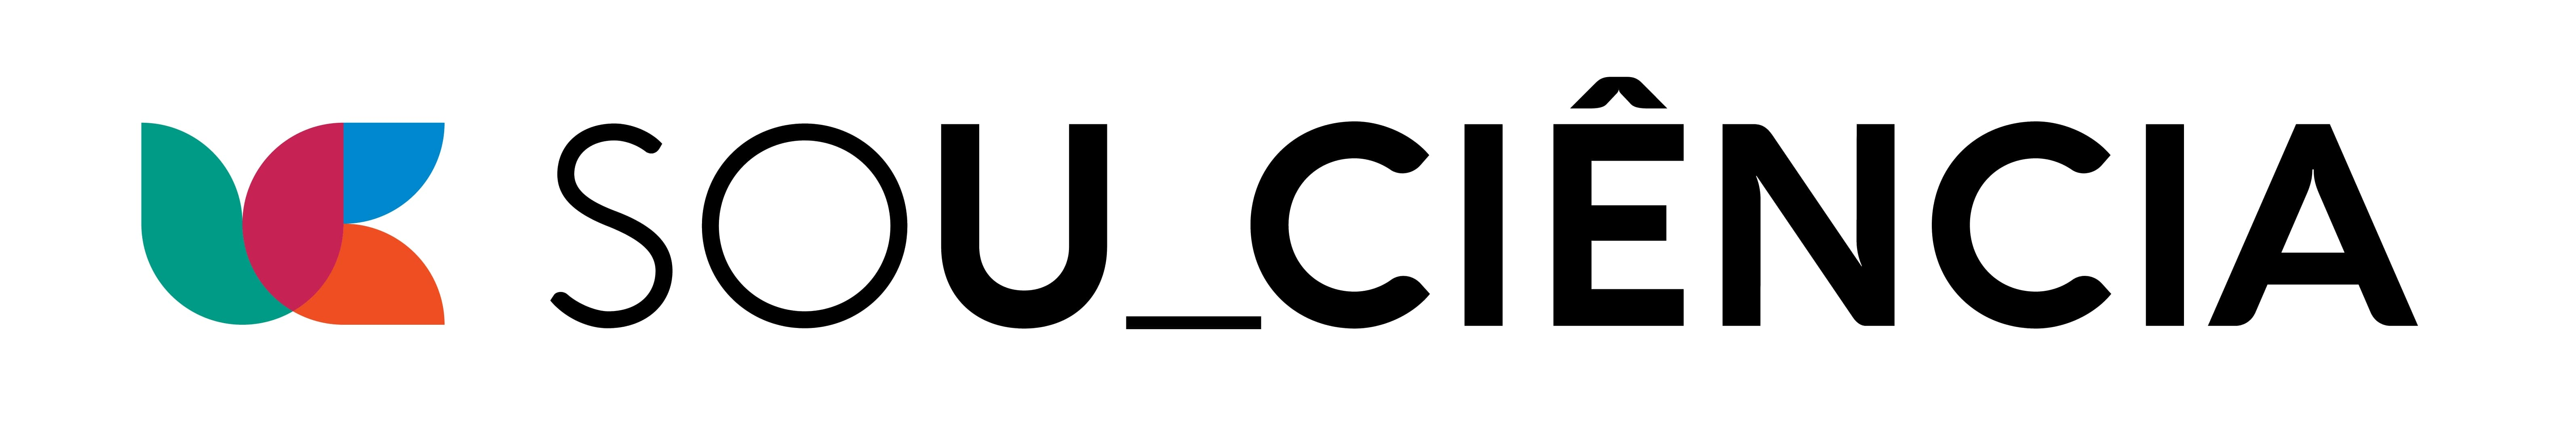

# Descrição

Desenvolvimento de um script em Python para limpeza dos dados do CAPES.

Autor: Antonio Guerreiro Silva Serrano

Bolsista: Pesquisador de Apoio Técnico

Início: 22-08-2023

Atualizado: 27-09-2023

# Importação das bibliotecas

In [ ]:
# Bibliotecas já instaladas

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import google.colab as gc
import re

import warnings

# Desativar o FutureWarning para a função replace
warnings.filterwarnings("ignore", category=FutureWarning)

# Instalação de bibliotecas específicas

In [ ]:
%%capture
%%shell

# Não separar as bibliotecas por vírgulas, apenas espaços.

libraries=("unidecode")

for library in "${libraries[@]}"; do
    pip install "$library"
done

In [ ]:
# Importação das bibliotecas instaladas

from unidecode import unidecode

# Integração com o Google Drive

In [ ]:
# Validação de usuário

gc.drive.mount('/content/drive')

gc.output.clear()

# Definindo o diretório de trabalho atual

In [ ]:
%cd ./drive/MyDrive/SoU_Ciencia/radiografia_universidades_21/

/content/drive/MyDrive/SoU_Ciencia/radiografia_universidades_21


# Atribuição de variáveis ao caminho relativo dos diretórios

In [ ]:
ces = "./ces_2021/dados/"

capes = './dados_capes/'

# Criação dos dataframes

## Censo da Educação Superior - CES

In [ ]:
# Identificar o separador ("sep") dos arquivos .CSV ou .csv

%%shell

caminho="./ces_2021/dados/"

for arquivo_csv in $caminho*.CSV $caminho*.csv; do
    if [ -f "$arquivo_csv" ]; then
        echo "Arquivo: $arquivo_csv"

        delimitadores=("," ";" "\t" "|")

        for delimitador in "${delimitadores[@]}"; do
            resultado=$(head -n 1 "$arquivo_csv" | grep -o "$delimitador" | wc -l)

            if [ "$resultado" -gt 0 ]; then
                echo "Separador: $delimitador"
                break
            fi
        done

        echo "--------------------------------------------------------"
    fi
done

Arquivo: ./ces_2021/dados/cadastro_cursos.CSV
Separador: ;
--------------------------------------------------------
Arquivo: ./ces_2021/dados/cadastro_ies.CSV
Separador: ;
--------------------------------------------------------
Arquivo: ./ces_2021/dados/cadastro_cursos_atualizado.csv
Separador: ;
--------------------------------------------------------
Arquivo: ./ces_2021/dados/cadastro_ies_atualizado.csv
Separador: ;
--------------------------------------------------------


In [ ]:
# # Lista os arquivos no diretório atual que atendem aos critérios
# arquivos = [f for f in os.listdir(ces) if os.path.isfile(os.path.join(ces, f)) and
#             f.lower().endswith('.csv') and f.lower().startswith('cadastro_') and not f.lower().endswith('_atualizado.csv')]

# # Define a função para extrair o nome dos arquivos sem a extensão ".csv" e em letras minúsculas
# def extrair_nome_arquivos(texto):
#     nome_arquivo = os.path.splitext(texto)[0].lower()
#     return nome_arquivo

# # Lista os arquivos no diretório atual aplicando a função "extrair_nome_arquivos" em cada arquivo listado
# nomes_de_arquivos = list(map(extrair_nome_arquivos, arquivos))

# # Cria dataframes a partir dos arquivos listados
# for i in range(len(nomes_de_arquivos)):
#     try:
#         arquivo_csv = os.path.join(ces, arquivos[i])
#         exec(f"{nomes_de_arquivos[i]} = pd.read_csv('{arquivo_csv}', sep=';', encoding='iso-8859-1', low_memory=False)")
#         print(f"Dataframe \033[34m{nomes_de_arquivos[i]}\033[0m criado a partir do arquivo \033[34m{arquivos[i]}\033[0m")
#     except Exception as e:
#         print("Erro ao criar o dataframe a partir do arquivo:", arquivos[i])

In [ ]:
# Criação de dataframes a partir da leitura de múltiplos arquivos no formato CSV

# Lista os arquivos no diretório que atendem aos critérios
arquivos = [f for f in os.listdir(ces) if f.startswith('cadastro_') and f.endswith('_atualizado.csv')]

# Cria dataframes a partir dos arquivos listados
for arquivo in arquivos:
    nome_dataframe = arquivo.replace('.csv', '').replace('_atualizado', '')  # Remove a extensão e o sufixo "_atualizado"
    caminho_arquivo = os.path.join(ces, arquivo)
    exec(f"{nome_dataframe} = pd.read_csv('{caminho_arquivo}', sep=';', encoding='utf-8', low_memory=False)")
    print(f"Dataframe \033[34m{nome_dataframe}\033[0m criado a partir do arquivo \033[34m{arquivo}\033[0m")

Dataframe cadastro_ies criado a partir do arquivo cadastro_ies_atualizado.csv
Dataframe cadastro_cursos criado a partir do arquivo cadastro_cursos_atualizado.csv


In [ ]:
# cadastro_cursos.head()

In [ ]:
# Exibir todos os nomes de colunas do dataframe cadastro_cursos

# for i in cadastro_cursos.columns.tolist():
#   print(i)

In [ ]:
# cadastro_ies.head()

In [ ]:
# Exibir todos os nomes de colunas do dataframe cadastro_ies

# for i in cadastro_ies.columns.tolist():
#   print(i)

### Visualização dos valores NaNs

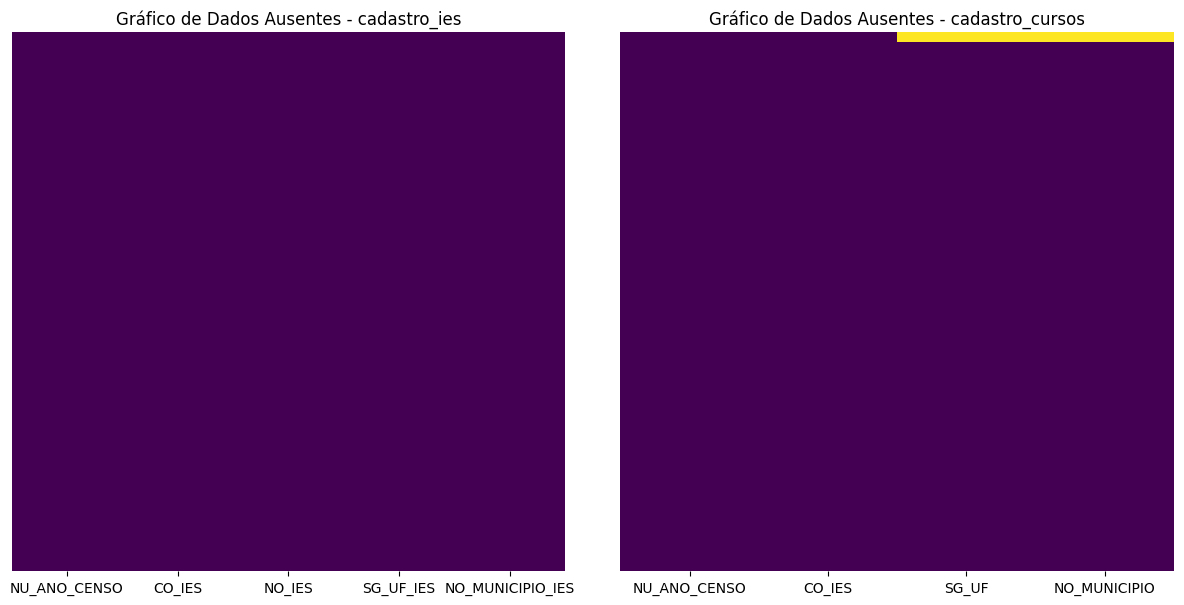

In [ ]:
# Lista de dataframes que atendem aos critérios
dataframes_cadastro = [(df_nome, df) for df_nome, df in globals().items() if df_nome.startswith("cadastro_") and isinstance(df, pd.DataFrame)]

# Dicionário com as colunas de interesse para cada dataframe
columns_of_interest = {
    'cadastro_ies': ['NU_ANO_CENSO', 'CO_IES', 'NO_IES', 'SG_UF_IES', 'NO_MUNICIPIO_IES'],
    'cadastro_cursos': ['NU_ANO_CENSO', 'CO_IES','SG_UF', 'NO_MUNICIPIO']
}

# Criar subplots para os gráficos
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
fig.subplots_adjust(wspace=0.1)

for i, (df_nome, df) in enumerate(dataframes_cadastro):
    ax = axs[i]

    # Verificar se o dataframe tem colunas de interesse definidas
    if df_nome in columns_of_interest and all(col in df.columns for col in columns_of_interest[df_nome]):
        sns.heatmap(df[columns_of_interest[df_nome]].isnull(),
                    yticklabels=False,
                    cbar=False,
                    cmap='viridis',
                    ax=ax)

        ax.set_title(f"Gráfico de Dados Ausentes - {df_nome}")
    else:
        ax.set_title(f"Colunas de Interesse Ausentes - {df_nome}")

plt.show()

## Coordenação de Aperfeiçoamento de Pessoal de Nível Superior - CAPES


In [ ]:
# Criação de dataframes a partir da leitura de múltiplos arquivos no formato XLSX

'''
Define a variável "caminho", ou seja, o diretório onde
os arquivos XLSX estão localizados.
'''

caminho = capes

'''
Lista os arquivos no diretório atual por meio da função listdir()
do módulo os, assim, os arquivos listados na variável "arquivos"
podem ser utilizados adiante partes do código.
'''

arquivos = [f for f in os.listdir(caminho) if os.path.isfile(os.path.join(caminho, f)) and f.lower().endswith('.xlsx')]

'''
Define a função "extrair_nome_arquivos" para extrair o nome
dos arquivos sem a extensão ".xlsx" e em letras minúsculas.
'''

def extrair_nome_arquivos(texto):
    nome_arquivo = os.path.splitext(texto)[0].lower()
    return nome_arquivo

'''
Lista os arquivos no diretório atual aplicando a função
"extrair_nome_arquivos" em cada arquivo listado.
'''

nomes_de_arquivos = list(map(extrair_nome_arquivos, arquivos))

'''
Cria dataframes a partir dos arquivos listados usando
a função exec() e imprimindo uma mensagem de sucesso ou de erro.
'''

for i in range(len(nomes_de_arquivos)):
    try:
        arquivo_xlsx = os.path.join(caminho, arquivos[i])
        exec(f"{nomes_de_arquivos[i]} = pd.read_excel('{arquivo_xlsx}')")
        print(f"Dataframe \033[34m{nomes_de_arquivos[i]}\033[0m criado a partir do arquivo \033[34m{arquivos[i]}\033[0m")
    except Exception as e:
        print("Erro ao criar o dataframe a partir do arquivo:", arquivos[i])
        print(e)

Dataframe capes_curso criado a partir do arquivo capes_curso.xlsx
Dataframe capes_discente criado a partir do arquivo capes_discente.xlsx
Dataframe capes_docente criado a partir do arquivo capes_docente.xlsx
Dataframe capes_prog criado a partir do arquivo capes_prog.xlsx


### IESs com mais de um código EMEC

In [ ]:
# Dicionário para armazenar o nome das IESs com mais de um valor de CD_ENTIDADE_ENSINO
ies_com_multiplos_cd = {}

# Lista dos nomes dos dataframes que começam com "capes_" e não terminam com "_atualizado"
dataframe_names = [df_nome for df_nome in globals() if df_nome.startswith("capes_") and not df_nome.endswith("_atualizado") and isinstance(globals()[df_nome], pd.DataFrame)]

# Itere pelos nomes dos dataframes
for df_nome in dataframe_names:
    df = globals()[df_nome]

    # Verifique se as colunas 'NM_ENTIDADE_ENSINO' e 'CD_ENTIDADE_ENSINO' existem no dataframe
    if {'NM_ENTIDADE_ENSINO', 'CD_ENTIDADE_ENSINO'}.issubset(df.columns):
        # Filtrar as linhas com valores diferentes de NaN ou NI em 'CD_ENTIDADE_ENSINO'
        filtro = (df['CD_ENTIDADE_ENSINO'].notna()) & (df['CD_ENTIDADE_ENSINO'] != "NI")

        # Agrupar o DataFrame por 'NM_ENTIDADE_ENSINO' e contar os valores únicos de 'CD_ENTIDADE_ENSINO'
        contagem_cd_por_ies = df[filtro].groupby('NM_ENTIDADE_ENSINO')['CD_ENTIDADE_ENSINO'].nunique()

        # Selecionar as IESs com mais de um valor de 'CD_ENTIDADE_ENSINO'
        ies_com_multiplos_cd[df_nome] = contagem_cd_por_ies[contagem_cd_por_ies > 1]

# Exibir o nome das IESs com mais de um valor de 'CD_ENTIDADE_ENSINO' para cada DataFrame
for df_nome, ies_com_multiplos in ies_com_multiplos_cd.items():
    if not ies_com_multiplos.empty:
        print(f"DataFrame {df_nome}:")
        print(ies_com_multiplos)

In [ ]:
capes_curso.head()

,AN_BASE,NM_GRANDE_AREA_CONHECIMENTO,NM_AREA_CONHECIMENTO,NM_SUBAREA_CONHECIMENTO,NM_ESPECIALIDADE,CD_AREA_AVALIACAO,NM_AREA_AVALIACAO,CD_ENTIDADE_CAPES,CD_ENTIDADE_EMEC,SG_ENTIDADE_ENSINO,...,NM_PROGRAMA_IES,CD_CURSO_PPG,NM_CURSO,NM_GRAU_CURSO,CD_CONCEITO_CURSO,AN_INICIO_PREVISTO,DS_SITUACAO_CURSO,DT_SITUACAO_CURSO,ID_ADD_FOTO_PROGRAMA_IES,ID_ADD_FOTO_PROGRAMA
0,2021,CIÊNCIAS SOCIAIS APLICADAS,ADMINISTRAÇÃO,NÃO SE APLICA,NÃO SE APLICA,27,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",42001013,581,UFRGS,...,ADMINISTRAÇÃO,42001013025M1,ADMINISTRAÇÃO,MESTRADO,5,1972,EM FUNCIONAMENTO,2019-11-12,207098,138680
1,2021,CIÊNCIAS AGRÁRIAS,AGRONOMIA,FITOTECNIA,MELHORAMENTO VEGETAL,42,CIÊNCIAS AGRÁRIAS I,31033016,1027,UENF,...,GENÉTICA E MELHORAMENTO DE PLANTAS,31033016015M3,GENÉTICA E MELHORAMENTO DE PLANTAS,MESTRADO,6,2005,EM FUNCIONAMENTO,2012-09-18,207402,138984
2,2021,CIÊNCIAS SOCIAIS APLICADAS,DESENHO INDUSTRIAL,NÃO SE APLICA,NÃO SE APLICA,29,"ARQUITETURA, URBANISMO E DESIGN",41002016,43,UDESC,...,DESIGN,41002016022D7,DESIGN,DOUTORADO,4,2019,EM FUNCIONAMENTO,2019-08-06,208834,140212
3,2021,CIÊNCIAS DA SAÚDE,FARMÁCIA,NÃO SE APLICA,NÃO SE APLICA,19,FARMÁCIA,32010010,596,UFVJM,...,CIÊNCIAS FARMACÊUTICAS,32010010009M7,CIÊNCIAS FARMACÊUTICAS,MESTRADO,3,2011,EM FUNCIONAMENTO,2012-07-06,208888,140246
4,2021,CIÊNCIAS EXATAS E DA TERRA,QUÍMICA,NÃO SE APLICA,NÃO SE APLICA,4,QUÍMICA,42003016,634,UFPEL,...,QUÍMICA,42003016028M3,QUÍMICA,MESTRADO,4,2007,EM FUNCIONAMENTO,2018-12-10,207754,139318


In [ ]:
# Exibir todos os nomes de colunas do dataframe capes_curso

for i in capes_curso.columns.tolist():
  print(i)

AN_BASE
NM_GRANDE_AREA_CONHECIMENTO
NM_AREA_CONHECIMENTO
NM_SUBAREA_CONHECIMENTO
NM_ESPECIALIDADE
CD_AREA_AVALIACAO
NM_AREA_AVALIACAO
CD_ENTIDADE_CAPES
CD_ENTIDADE_EMEC
SG_ENTIDADE_ENSINO
NM_ENTIDADE_ENSINO
CS_STATUS_JURIDICO
DS_DEPENDENCIA_ADMINISTRATIVA
DS_ORGANIZACAO_ACADEMICA
NM_REGIAO
SG_UF_PROGRAMA
NM_MUNICIPIO_PROGRAMA_IES
CD_PROGRAMA_IES
NM_PROGRAMA_IES
CD_CURSO_PPG
NM_CURSO
NM_GRAU_CURSO
CD_CONCEITO_CURSO
AN_INICIO_PREVISTO
DS_SITUACAO_CURSO
DT_SITUACAO_CURSO
ID_ADD_FOTO_PROGRAMA_IES
ID_ADD_FOTO_PROGRAMA


In [ ]:
capes_discente.head()

,AN_BASE,NM_GRANDE_AREA_CONHECIMENTO,CD_AREA_AVALIACAO,NM_AREA_AVALIACAO,CD_ENTIDADE_CAPES,CD_ENTIDADE_EMEC,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,CS_STATUS_JURIDICO,DS_DEPENDENCIA_ADMINISTRATIVA,...,DS_GRAU_ACADEMICO_DISCENTE,ST_INGRESSANTE,NM_SITUACAO_DISCENTE,DT_MATRICULA_DISCENTE,DT_SITUACAO_DISCENTE,QT_MES_TITULACAO,NM_TESE_DISSERTACAO,NM_ORIENTADOR_PRINCIPAL,ID_ADD_FOTO_PROGRAMA,ID_ADD_FOTO_PROGRAMA_IES
0,2021,CIÊNCIAS HUMANAS,40,HISTÓRIA,10001018,699.0,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,PÚBLICA,...,MESTRADO,SIM,MATRICULADO,2021-08-02,2021-08-02,0,NÃO SE APLICA,NÃO SE APLICA,147843,214455
1,2021,CIÊNCIAS HUMANAS,38,EDUCAÇÃO,10001018,699.0,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,PÚBLICA,...,DOUTORADO PROFISSIONAL,NÃO,MATRICULADO,2020-12-04,2020-12-04,0,NÃO SE APLICA,NÃO SE APLICA,147046,213430
2,2021,MULTIDISCIPLINAR,49,CIÊNCIAS AMBIENTAIS,10001018,699.0,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,PÚBLICA,...,MESTRADO,SIM,MATRICULADO,2021-07-01,2021-07-01,0,NÃO SE APLICA,NÃO SE APLICA,147062,213420
3,2021,CIÊNCIAS HUMANAS,38,EDUCAÇÃO,10001018,699.0,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,PÚBLICA,...,DOUTORADO PROFISSIONAL,SIM,MATRICULADO,2021-12-14,2021-12-14,0,NÃO SE APLICA,NÃO SE APLICA,147046,213430
4,2021,CIÊNCIAS HUMANAS,36,GEOGRAFIA,10001018,699.0,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,PÚBLICA,...,DOUTORADO,NÃO,MATRICULADO,2020-02-17,2020-02-17,0,NÃO SE APLICA,NÃO SE APLICA,145878,212331


In [ ]:
# Exibir todos os nomes de colunas do dataframe capes_discente

for i in capes_discente.columns.tolist():
  print(i)

AN_BASE
NM_GRANDE_AREA_CONHECIMENTO
CD_AREA_AVALIACAO
NM_AREA_AVALIACAO
CD_ENTIDADE_CAPES
CD_ENTIDADE_EMEC
SG_ENTIDADE_ENSINO
NM_ENTIDADE_ENSINO
CS_STATUS_JURIDICO
DS_DEPENDENCIA_ADMINISTRATIVA
NM_MODALIDADE_PROGRAMA
NM_GRAU_PROGRAMA
CD_PROGRAMA_IES
NM_PROGRAMA_IES
NM_REGIAO
SG_UF_PROGRAMA
NM_MUNICIPIO_PROGRAMA_IES
CD_CONCEITO_PROGRAMA
CD_CONCEITO_CURSO
ID_PESSOA
TP_DOCUMENTO_DISCENTE
NR_DOCUMENTO_DISCENTE
NM_DISCENTE
NM_PAIS_NACIONALIDADE_DISCENTE
DS_TIPO_NACIONALIDADE_DISCENTE
AN_NASCIMENTO_DISCENTE
DS_FAIXA_ETARIA
DS_GRAU_ACADEMICO_DISCENTE
ST_INGRESSANTE
NM_SITUACAO_DISCENTE
DT_MATRICULA_DISCENTE
DT_SITUACAO_DISCENTE
QT_MES_TITULACAO
NM_TESE_DISSERTACAO
NM_ORIENTADOR_PRINCIPAL
ID_ADD_FOTO_PROGRAMA
ID_ADD_FOTO_PROGRAMA_IES


In [ ]:
capes_docente.head()

,AN_BASE,CD_AREA_AVALIACAO,NM_AREA_AVALIACAO,NM_GRANDE_AREA_CONHECIMENTO,NM_AREA_CONHECIMENTO,CD_PROGRAMA_IES,NM_PROGRAMA_IES,NM_GRAU_PROGRAMA,NM_MODALIDADE_PROGRAMA,CD_CONCEITO_PROGRAMA,...,IN_DOUTOR,AN_TITULACAO,NM_GRAU_TITULACAO,CD_AREA_BASICA_TITULACAO,NM_AREA_BASICA_TITULACAO,SG_IES_TITULACAO,NM_IES_TITULACAO,NM_PAIS_IES_TITULACAO,ID_ADD_FOTO_PROGRAMA,ID_ADD_FOTO_PROGRAMA_IES
0,2021,45,INTERDISCIPLINAR,MULTIDISCIPLINAR,INTERDISCIPLINAR,10001018004P4,DESENVOLVIMENTO REGIONAL E MEIO AMBIENTE,MESTRADO/DOUTORADO,ACADÊMICO,4,...,S,2002,DOUTORADO,90100000,INTERDISCIPLINAR,UFSC,UNIVERSIDADE FEDERAL DE SANTA CATARINA,BRASIL,142263,211255
1,2021,46,ENSINO,MULTIDISCIPLINAR,ENSINO,10001018040P0,ENSINO DE CIÊNCIAS DA NATUREZA - PPGECN,MESTRADO,ACADÊMICO,3,...,S,2016,DOUTORADO,50100009,AGRONOMIA,UEM,UNIVERSIDADE ESTADUAL DE MARINGÁ,BRASIL,147582,214188
2,2021,7,BIODIVERSIDADE,CIÊNCIAS BIOLÓGICAS,ECOLOGIA,10001018041P7,CONSERVAÇÃO E USO DE RECURSOS NATURAIS,MESTRADO,ACADÊMICO,A,...,S,2005,DOUTORADO,20300000,BOTÂNICA,UNESP-RC,UNIVERSIDADE ESTADUAL PAULISTA JÚLIO DE MESQUI...,BRASIL,147613,214244
3,2021,38,EDUCAÇÃO,CIÊNCIAS HUMANAS,EDUCAÇÃO,10001018016P2,EDUCAÇÃO ESCOLAR,MESTRADO PROFISSIONAL/DOUTORADO PROFISSIONAL,PROFISSIONAL,4,...,S,2009,DOUTORADO,10600000,QUÍMICA,UNESP-ARAR,UNIVERSIDADE ESTADUAL PAULISTA JÚLIO DE MESQUI...,BRASIL,147046,213430
4,2021,45,INTERDISCIPLINAR,MULTIDISCIPLINAR,INTERDISCIPLINAR,10001018044P6,AGROECOSSISTEMAS AMAZÔNICOS,MESTRADO,ACADÊMICO,A,...,S,2015,DOUTORADO,50101005,CIÊNCIA DO SOLO,UFRPE,UNIVERSIDADE FEDERAL RURAL DE PERNAMBUCO,BRASIL,147773,214407


In [ ]:
# Exibir todos os nomes de colunas do dataframe capes_docente

for i in capes_docente.columns.tolist():
  print(i)

AN_BASE
CD_AREA_AVALIACAO
NM_AREA_AVALIACAO
NM_GRANDE_AREA_CONHECIMENTO
NM_AREA_CONHECIMENTO
CD_PROGRAMA_IES
NM_PROGRAMA_IES
NM_GRAU_PROGRAMA
NM_MODALIDADE_PROGRAMA
CD_CONCEITO_PROGRAMA
CD_ENTIDADE_CAPES
CD_ENTIDADE_EMEC
SG_ENTIDADE_ENSINO
NM_ENTIDADE_ENSINO
DS_DEPENDENCIA_ADMINISTRATIVA
CS_STATUS_JURIDICO
NM_MUNICIPIO_PROGRAMA_IES
SG_UF_PROGRAMA
NM_REGIAO
ID_PESSOA
TP_DOCUMENTO_DOCENTE
NR_DOCUMENTO_DOCENTE
NM_DOCENTE
AN_NASCIMENTO_DOCENTE
DS_FAIXA_ETARIA
DS_TIPO_NACIONALIDADE_DOCENTE
NM_PAIS_NACIONALIDADE_DOCENTE
DS_CATEGORIA_DOCENTE
DS_TIPO_VINCULO_DOCENTE_IES
DS_REGIME_TRABALHO
CD_CAT_BOLSA_PRODUTIVIDADE
IN_DOUTOR
AN_TITULACAO
NM_GRAU_TITULACAO
CD_AREA_BASICA_TITULACAO
NM_AREA_BASICA_TITULACAO
SG_IES_TITULACAO
NM_IES_TITULACAO
NM_PAIS_IES_TITULACAO
ID_ADD_FOTO_PROGRAMA
ID_ADD_FOTO_PROGRAMA_IES


In [ ]:
capes_prog.head()

,AN_BASE,NM_GRANDE_AREA_CONHECIMENTO,NM_AREA_CONHECIMENTO,NM_AREA_BASICA,NM_SUBAREA_CONHECIMENTO,NM_ESPECIALIDADE,CD_AREA_AVALIACAO,NM_AREA_AVALIACAO,CD_ENTIDADE_CAPES,CD_ENTIDADE_EMEC,...,NM_PROGRAMA_IES,NM_PROGRAMA_IDIOMA,NM_GRAU_PROGRAMA,CD_CONCEITO_PROGRAMA,AN_INICIO_PROGRAMA,AN_INICIO_CURSO,DS_SITUACAO_PROGRAMA,DT_SITUACAO_PROGRAMA,ID_ADD_FOTO_PROGRAMA_IES,ID_ADD_FOTO_PROGRAMA
0,2021,MULTIDISCIPLINAR,INTERDISCIPLINAR,SOCIAIS E HUMANIDADES,SOCIAIS E HUMANIDADES,NÃO SE APLICA,45,INTERDISCIPLINAR,10001018,699,...,DIREITOS HUMANOS E DESENVOLVIMENTO DA JUSTIÇA,PROFESSIONAL INTERDISCIPLINARY MASTER ON HUMAN...,MESTRADO PROFISSIONAL,3,2017,2017,EM FUNCIONAMENTO,2017-05-02,214057,147489
1,2021,MULTIDISCIPLINAR,ENSINO,ENSINO DE CIÊNCIAS E MATEMÁTICA,ENSINO DE CIÊNCIAS E MATEMÁTICA,NÃO SE APLICA,46,ENSINO,10001018,699,...,EDUCAÇÃO MATEMÁTICA,MATHEMATICAL EDUCATION,MESTRADO,A,2019,2019,EM FUNCIONAMENTO,2019-09-10,214249,147618
2,2021,CIÊNCIAS HUMANAS,EDUCAÇÃO,EDUCAÇÃO,NÃO SE APLICA,NÃO SE APLICA,38,EDUCAÇÃO,10001018,699,...,EDUCAÇÃO,ACADEMIC MASTER'S DEGREE IN EDUCATION,MESTRADO,4,2010,2010,EM FUNCIONAMENTO,2012-03-20,212773,146443
3,2021,CIÊNCIAS HUMANAS,PSICOLOGIA,PSICOLOGIA,NÃO SE APLICA,NÃO SE APLICA,37,PSICOLOGIA,10001018,699,...,PSICOLOGIA,GRADUATE PROGRAM PSYCOLOGY,MESTRADO,3,2009,2009,EM FUNCIONAMENTO,2013-05-29,212729,146382
4,2021,CIÊNCIAS SOCIAIS APLICADAS,ADMINISTRAÇÃO,ADMINISTRAÇÃO,NÃO SE APLICA,NÃO SE APLICA,27,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",10001018,699,...,ADMINISTRAÇÃO,MASTER IN ADMINISTRATION,MESTRADO,3,2006,2006,EM FUNCIONAMENTO,2013-12-30,212377,145944


In [ ]:
# Exibir todos os nomes de colunas do dataframe capes_prog

for i in capes_prog.columns.tolist():
  print(i)

AN_BASE
NM_GRANDE_AREA_CONHECIMENTO
NM_AREA_CONHECIMENTO
NM_AREA_BASICA
NM_SUBAREA_CONHECIMENTO
NM_ESPECIALIDADE
CD_AREA_AVALIACAO
NM_AREA_AVALIACAO
CD_ENTIDADE_CAPES
CD_ENTIDADE_EMEC
SG_ENTIDADE_ENSINO
NM_ENTIDADE_ENSINO
IN_REDE
SG_ENTIDADE_ENSINO_REDE
CS_STATUS_JURIDICO
DS_DEPENDENCIA_ADMINISTRATIVA
DS_ORGANIZACAO_ACADEMICA
NM_REGIAO
SG_UF_PROGRAMA
NM_MUNICIPIO_PROGRAMA_IES
NM_MODALIDADE_PROGRAMA
CD_PROGRAMA_IES
NM_PROGRAMA_IES
NM_PROGRAMA_IDIOMA
NM_GRAU_PROGRAMA
CD_CONCEITO_PROGRAMA
AN_INICIO_PROGRAMA
AN_INICIO_CURSO
DS_SITUACAO_PROGRAMA
DT_SITUACAO_PROGRAMA
ID_ADD_FOTO_PROGRAMA_IES
ID_ADD_FOTO_PROGRAMA


### Qunatidade de valores NI presentes na coluna CD_ENTIDADE_EMEC por dataframe

In [ ]:
# Definição de parâmetros de cor
GREEN_COLOR = '\033[92m'
END_COLOR = '\033[0m'

# Função para contar valores "NI" na coluna CD_ENTIDADE_EMEC
def contar_ni(df):
    return (df['CD_ENTIDADE_EMEC'] == 'NI').sum()

# Criar uma cópia do dicionário global
global_dict_copy = globals().copy()

# Iterar pela cópia dos dataframes cujo nome começa com "capes_"
for df_nome, df in global_dict_copy.items():
    if df_nome.startswith("capes_") and isinstance(df, pd.DataFrame):
        ni_count = contar_ni(df)
        print(f"No dataframe {GREEN_COLOR}{df_nome}{END_COLOR}, quantidade de valores 'NI' na coluna {GREEN_COLOR}CD_ENTIDADE_EMEC{END_COLOR}: {ni_count} \n")

No dataframe capes_curso, quantidade de valores 'NI' na coluna CD_ENTIDADE_EMEC: 777 

No dataframe capes_discente, quantidade de valores 'NI' na coluna CD_ENTIDADE_EMEC: 0 

No dataframe capes_docente, quantidade de valores 'NI' na coluna CD_ENTIDADE_EMEC: 12713 

No dataframe capes_prog, quantidade de valores 'NI' na coluna CD_ENTIDADE_EMEC: 491 



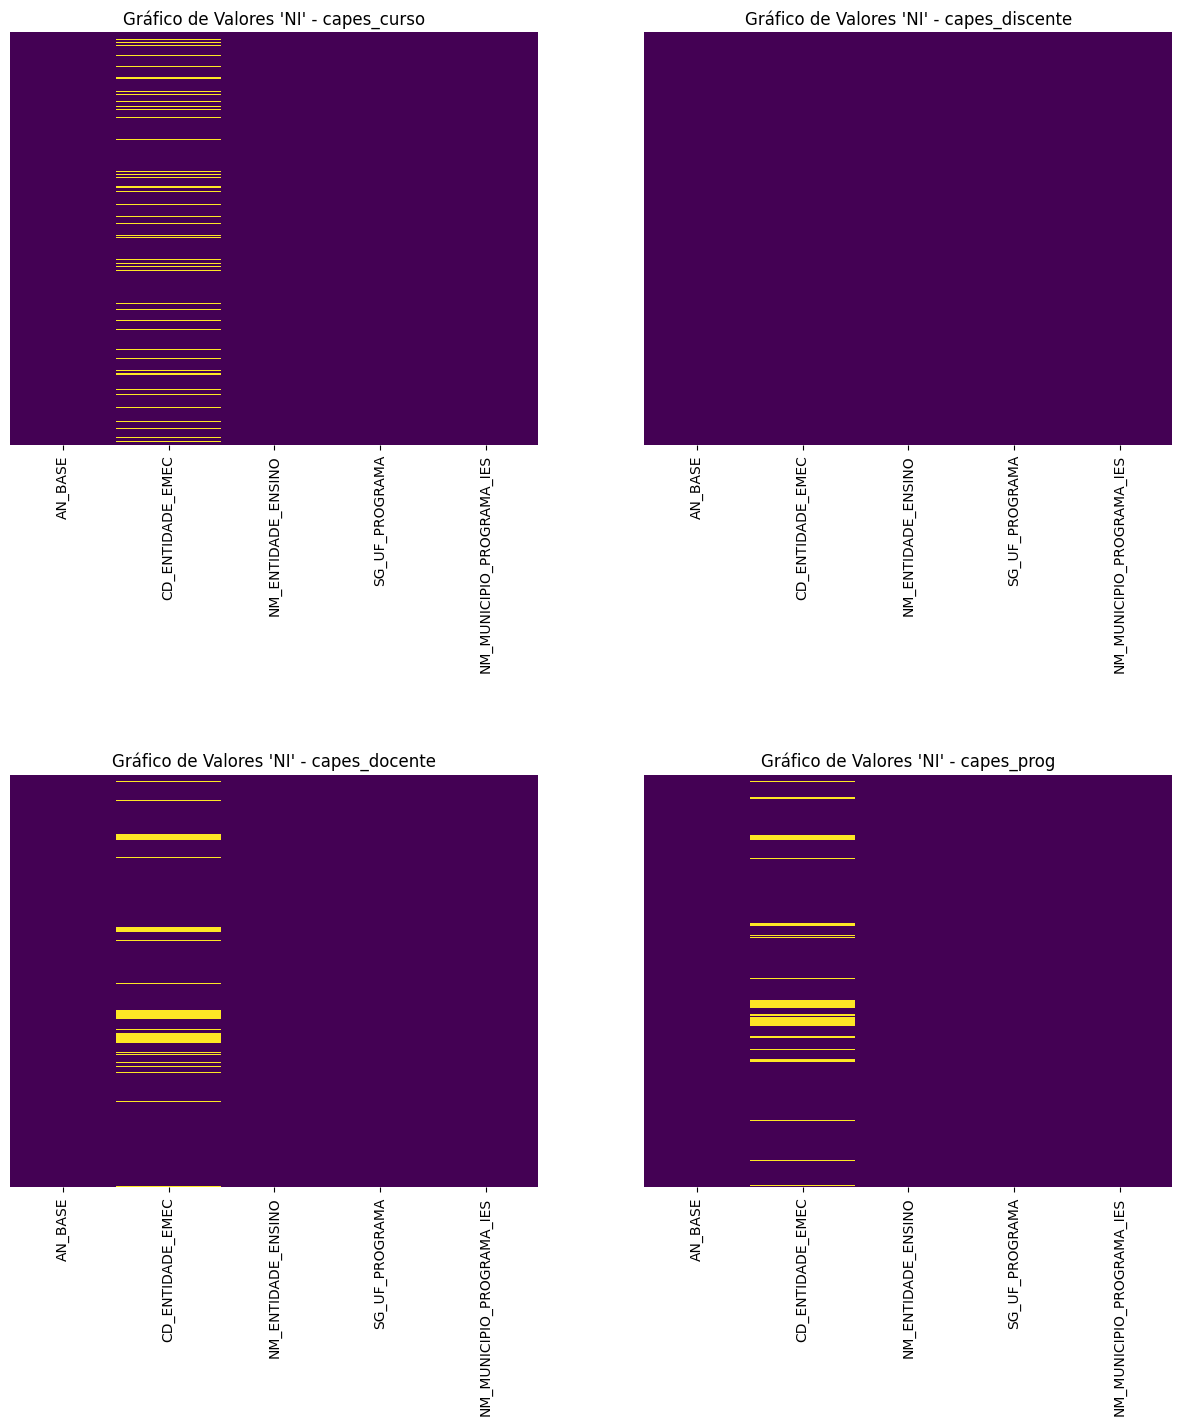

In [ ]:
# @title
# Lista de dataframes que atendem aos critérios
dataframes_capes = [(df_nome, df) for df_nome, df in globals().items() if df_nome.startswith("capes_") and not df_nome.endswith("_atualizado") and isinstance(df, pd.DataFrame)]

# Colunas de interesse
columns_of_interest = ['AN_BASE', 'CD_ENTIDADE_EMEC', 'NM_ENTIDADE_ENSINO', 'SG_UF_PROGRAMA', 'NM_MUNICIPIO_PROGRAMA_IES']

# Criar subplots para os gráficos
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
fig.subplots_adjust(hspace=0.8)

for i, (df_nome, df) in enumerate(dataframes_capes):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    sns.heatmap(df[columns_of_interest] == 'NI',
                yticklabels=False,
                cbar=False,
                cmap='viridis',
                ax=ax)

    ax.set_title(f"Gráfico de Valores 'NI' - {df_nome}")

plt.show()

### Qunatidade de valores NaNs presentes na coluna CD_ENTIDADE_EMEC por dataframe

In [ ]:
# Definição de parâmetros de cor
GREEN_COLOR = '\033[92m'
END_COLOR = '\033[0m'

# Função para contar valores NaN na coluna CD_ENTIDADE_EMEC
def contar_nans(df):
    return df['CD_ENTIDADE_EMEC'].isna().sum()

# Criar uma cópia dos dataframes que atendem ao critério
dataframes_capes = [(df_nome, df) for df_nome, df in globals().items() if df_nome.startswith("capes_") and isinstance(df, pd.DataFrame)]

# Iterar pelos dataframes cujo nome começa com "capes_"
for df_nome, df in dataframes_capes:
    nan_count = contar_nans(df)
    print(f"No dataframe {GREEN_COLOR}{df_nome}{END_COLOR}, quantidade de valores NaN na coluna {GREEN_COLOR}CD_ENTIDADE_EMEC{END_COLOR}: {nan_count} \n")

No dataframe capes_curso, quantidade de valores NaN na coluna CD_ENTIDADE_EMEC: 0 

No dataframe capes_discente, quantidade de valores NaN na coluna CD_ENTIDADE_EMEC: 45790 

No dataframe capes_docente, quantidade de valores NaN na coluna CD_ENTIDADE_EMEC: 411 

No dataframe capes_prog, quantidade de valores NaN na coluna CD_ENTIDADE_EMEC: 0 



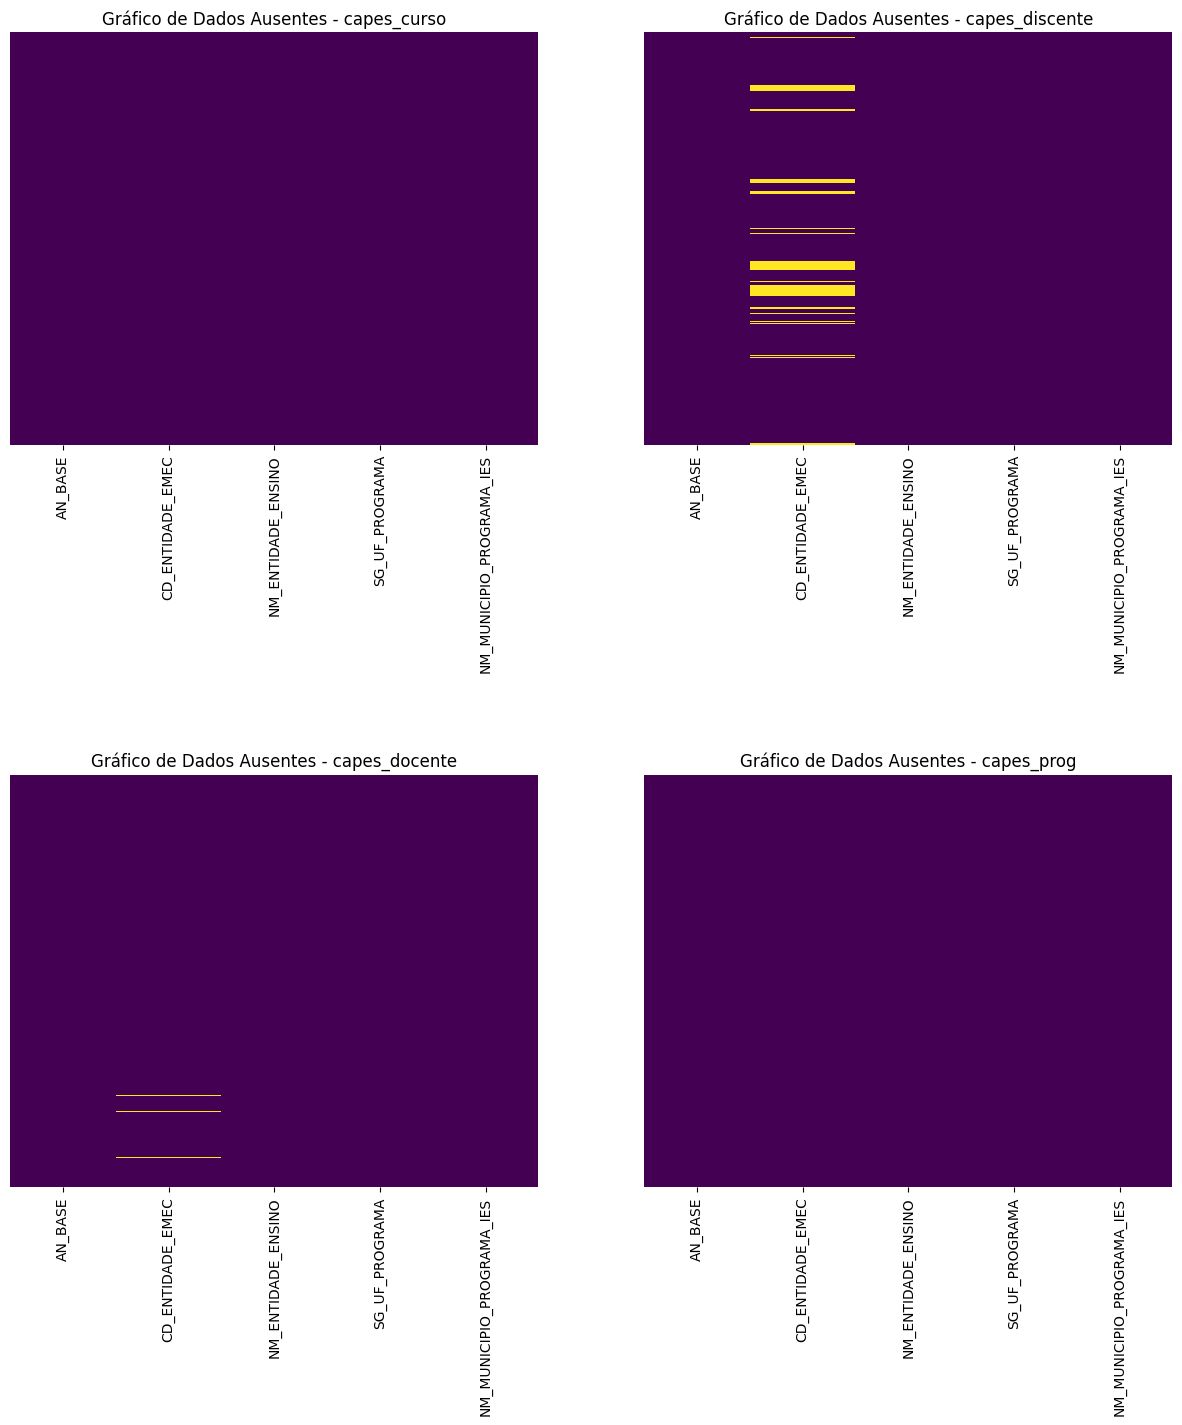

In [ ]:
# @title
# Lista de dataframes que atendem aos critérios
dataframes_capes = [(df_nome, df) for df_nome, df in globals().items() if df_nome.startswith("capes_") and not df_nome.endswith("_atualizado") and isinstance(df, pd.DataFrame)]

# Colunas de interesse
columns_of_interest = ['AN_BASE', 'CD_ENTIDADE_EMEC', 'NM_ENTIDADE_ENSINO', 'SG_UF_PROGRAMA', 'NM_MUNICIPIO_PROGRAMA_IES']

# Criar subplots para os gráficos
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
fig.subplots_adjust(hspace=0.8)

for i, (df_nome, df) in enumerate(dataframes_capes):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    sns.heatmap(df[columns_of_interest].isnull(),
                yticklabels=False,
                cbar=False,
                cmap='viridis',
                ax=ax)

    ax.set_title(f"Gráfico de Dados Ausentes - {df_nome}")

plt.show()

# Pré-tratamento de dados

## Tabela de valores padrão para a coluna 'NM_ENTIDADE_ENSINO'

## Identificação de anomalias

Termos semanticamente imprecisos, abreviações e siglas.

Este código irá identificar apenas os elementos que contenham exatamente os fragmentos de string indicados como palavras-chave ('UNIV', 'FED') na coluna 'NM_ENTIDADE_ENSINO' nos DataFrames.

In [ ]:
# @title
# Obter uma lista de todas as variáveis globais
variaveis_globais = globals()

# Filtrar as variáveis globais que são DataFrames e seguem o padrão de nomenclatura desejado
nomes_dataframes = [nome for nome, valor in variaveis_globais.items() if isinstance(valor, pd.DataFrame) and nome.startswith('capes_') and not nome.endswith('_atualizado')]

# Lista para armazenar os DataFrames processados
dataframes_processados = []

# Palavras-chave que queremos identificar
palavras_chave = ['FUND.', 'UNIV.', 'EST.']

# Função para verificar se uma string contém uma das palavras-chave exatamente
def contem_palavra_chave_exatamente(texto):
    return any(palavra in texto for palavra in palavras_chave if palavra in texto)

# Iterar pelos DataFrames identificados
for nome_dataframe in nomes_dataframes:
    dataframe = variaveis_globais[nome_dataframe]

    # Aplicar a função à coluna 'NM_ENTIDADE_ENSINO' e filtrar o DataFrame
    linhas_com_palavras_chave = dataframe[dataframe['NM_ENTIDADE_ENSINO'].apply(contem_palavra_chave_exatamente)]

    # Exibir apenas as colunas 'CD_ENTIDADE_EMEC', 'NM_ENTIDADE_ENSINO' e 'SG_UF_PROGRAMA'
    colunas_selecionadas = linhas_com_palavras_chave[['CD_ENTIDADE_EMEC', 'NM_ENTIDADE_ENSINO', 'SG_UF_PROGRAMA']]

    # Remover duplicatas e manter apenas os valores únicos
    colunas_selecionadas_sem_duplicatas = colunas_selecionadas.drop_duplicates()

    # Adicionar o DataFrame processado à lista
    dataframes_processados.append(colunas_selecionadas_sem_duplicatas)

# Combinar todos os DataFrames em um único DataFrame
colunas_selecionadas_sem_duplicatas = pd.concat(dataframes_processados, ignore_index=True)

# Remover duplicatas do DataFrame concatenado
df_anomalias = colunas_selecionadas_sem_duplicatas.drop_duplicates()

# Renomear a coluna 'NM_ENTIDADE_ENSINO' para 'NM_ENTIDADE_ENSINO_original'
df_anomalias = df_anomalias.rename(columns={'NM_ENTIDADE_ENSINO': 'NM_ENTIDADE_ENSINO_original'})

# Criar uma nova coluna 'NM_ENTIDADE_ENSINO_padrao' com valores vazios
df_anomalias['NM_ENTIDADE_ENSINO_padrao'] = ''

# Reposicionar a coluna 'SG_UF_PROGRAMA' para a última posição
# Remover a coluna 'SG_UF_PROGRAMA'
uf_programa = df_anomalias.pop('SG_UF_PROGRAMA')

# Adicionar a coluna 'SG_UF_PROGRAMA' de volta ao final
df_anomalias['SG_UF_PROGRAMA'] = uf_programa

# Use o método to_string() para exibir o DataFrame inteiro
print(df_anomalias.to_string())

  CD_ENTIDADE_EMEC                                  NM_ENTIDADE_ENSINO_original NM_ENTIDADE_ENSINO_padrao SG_UF_PROGRAMA
0              717  FUNDAÇÃO UNIV. FEDERAL DE CIÊNCIAS DA SAÚDE DE PORTO ALEGRE                                       RS
1              532    UNIV. REGIONAL DO NOROESTE DO ESTADO DO RIO GRANDE DO SUL                                       RS
2            717.0  FUNDAÇÃO UNIV. FEDERAL DE CIÊNCIAS DA SAÚDE DE PORTO ALEGRE                                       RS
3            532.0    UNIV. REGIONAL DO NOROESTE DO ESTADO DO RIO GRANDE DO SUL                                       RS


Este código irá identificar apenas os elementos que contenham exatamente a sequência 'FUNDAÇÃO UNIVERSIDADE' na coluna 'NM_ENTIDADE_ENSINO' nos DataFrames.

In [ ]:
# @title
# Obter uma lista de todas as variáveis globais
variaveis_globais = globals()

# Filtrar as variáveis globais que são DataFrames e seguem o padrão de nomenclatura desejado
nomes_dataframes = [nome for nome, valor in variaveis_globais.items() if isinstance(valor, pd.DataFrame) and nome.startswith('capes_') and not nome.endswith('_atualizado')]

# Lista para armazenar os DataFrames processados
dataframes_processados = []

# Função para verificar se uma string contém exatamente a sequência 'FUNDAÇÃO UNIVERSIDADE'
def contem_sequencia_exata(texto):
    return 'FUNDAÇÃO UNIVERSIDADE' in texto

# Iterar pelos DataFrames identificados
for nome_dataframe in nomes_dataframes:
    dataframe = variaveis_globais[nome_dataframe]

    # Aplicar a função à coluna 'NM_ENTIDADE_ENSINO' e filtrar o DataFrame
    linhas_com_sequencia_exata = dataframe[dataframe['NM_ENTIDADE_ENSINO'].apply(contem_sequencia_exata)]

    # Exibir apenas as colunas 'CD_ENTIDADE_EMEC', 'NM_ENTIDADE_ENSINO' e 'SG_UF_PROGRAMA'
    colunas_selecionadas = linhas_com_sequencia_exata[['CD_ENTIDADE_EMEC', 'NM_ENTIDADE_ENSINO', 'SG_UF_PROGRAMA']]

    # Remover duplicatas e manter apenas os valores únicos
    colunas_selecionadas_sem_duplicatas = colunas_selecionadas.drop_duplicates()

    # Adicionar o DataFrame processado à lista
    dataframes_processados.append(colunas_selecionadas_sem_duplicatas)

# Combinar todos os DataFrames em um único DataFrame
colunas_selecionadas_sem_duplicatas = pd.concat(dataframes_processados, ignore_index=True)

# Remover duplicatas do DataFrame concatenado
df_anomalias = colunas_selecionadas_sem_duplicatas.drop_duplicates()

# Renomear a coluna 'NM_ENTIDADE_ENSINO' para 'NM_ENTIDADE_ENSINO_original'
df_anomalias = df_anomalias.rename(columns={'NM_ENTIDADE_ENSINO': 'NM_ENTIDADE_ENSINO_original'})

# Criar uma nova coluna 'NM_ENTIDADE_ENSINO_padrao' com valores vazios
df_anomalias['NM_ENTIDADE_ENSINO_padrao'] = ''

# Reposicionar a coluna 'SG_UF_PROGRAMA' para a última posição
# Remover a coluna 'SG_UF_PROGRAMA'
uf_programa = df_anomalias.pop('SG_UF_PROGRAMA')

# Adicionar a coluna 'SG_UF_PROGRAMA' de volta ao final
df_anomalias['SG_UF_PROGRAMA'] = uf_programa

# Use o método to_string() para exibir o DataFrame inteiro
print(df_anomalias.to_string())

   CD_ENTIDADE_EMEC                               NM_ENTIDADE_ENSINO_original NM_ENTIDADE_ENSINO_padrao SG_UF_PROGRAMA
0                 5                    FUNDAÇÃO UNIVERSIDADE FEDERAL DO PIAUÍ                                       PI
1               694       FUNDAÇÃO UNIVERSIDADE FEDERAL DE MATO GROSSO DO SUL                                       MS
2                20                      FUNDAÇÃO UNIVERSIDADE DE PASSO FUNDO                                       RS
3                 3                  FUNDAÇÃO UNIVERSIDADE FEDERAL DE SERGIPE                                       SE
4              3849                FUNDAÇÃO UNIVERSIDADE FEDERAL DO TOCANTINS                                       TO
5               789                  FUNDAÇÃO UNIVERSIDADE FEDERAL DE RORAIMA                                       RR
6              5322                    FUNDAÇÃO UNIVERSIDADE FEDERAL DO PAMPA                                       RS
7                NI        FUNDAÇÃO UNIVERSIDADE

Verificação da presença de 'siglas' na coluna 'NM_ENTIDADE_ENSINO' nos DataFrames

In [ ]:
# @title
# Crie uma cópia da lista de DataFrames para evitar erros de modificação durante a iteração
dataframes_copy = list(globals().items())

# Lista para armazenar DataFrames que atendem aos critérios desejados
dataframes_processados = []

for nome_dataframe, dataframe in dataframes_copy:
    if isinstance(dataframe, pd.DataFrame) and nome_dataframe.startswith('capes_') and not nome_dataframe.endswith('_atualizado'):
        linhas_com_tamanho_limite = dataframe[dataframe['NM_ENTIDADE_ENSINO'].str.len() <= 10]
        colunas_selecionadas = linhas_com_tamanho_limite[['CD_ENTIDADE_EMEC', 'NM_ENTIDADE_ENSINO', 'SG_UF_PROGRAMA']].drop_duplicates()
        dataframes_processados.append(colunas_selecionadas)

# Combinar todos os DataFrames em um único DataFrame
df_siglas = pd.concat(dataframes_processados, ignore_index=True)

# Renomear a coluna 'NM_ENTIDADE_ENSINO' para 'NM_ENTIDADE_ENSINO_original'
df_siglas = df_siglas.rename(columns={'NM_ENTIDADE_ENSINO': 'NM_ENTIDADE_ENSINO_original'})

# Criar uma nova coluna 'NM_ENTIDADE_ENSINO_padrao' com valores vazios
df_siglas['NM_ENTIDADE_ENSINO_padrao'] = ''

# Reposicionar a coluna 'SG_UF_PROGRAMA' para a última posição
# Remover a coluna 'SG_UF_PROGRAMA'
uf_programa = df_siglas.pop('SG_UF_PROGRAMA')

# Adicionar a coluna 'SG_UF_PROGRAMA' de volta ao final
df_siglas['SG_UF_PROGRAMA'] = uf_programa

# Use o método to_string() para exibir o DataFrame inteiro
print(df_siglas.to_string())

Empty DataFrame
Columns: [CD_ENTIDADE_EMEC, NM_ENTIDADE_ENSINO_original, NM_ENTIDADE_ENSINO_padrao, SG_UF_PROGRAMA]
Index: []


## Identificação de caracteres especiais na coluna 'NM_ENTIDADE_ENSINO' dos dfs capes_xxx

In [ ]:
# @title
# Função para verificar se uma string contém termos entre parênteses ou após um traço ('-')
def possui_termos_especiais(texto):
    padrao = r'\(.*\)|\[.*\]|\{.*\}|[\'"].*?[\'"]|(?<=\s[-–—]\s)|[!@#$%^&*+=<>?¿.;:_{}|~"\[\]\\]'
    return bool(re.search(padrao, str(texto)))

# Obter uma lista de todas as variáveis globais
variaveis_globais = globals()

# Filtrar as variáveis globais que são DataFrames e seguem o padrão de nomenclatura desejado
nomes_dataframes = [nome for nome, valor in variaveis_globais.items() if isinstance(valor, pd.DataFrame) and nome.startswith('capes_') and not nome.endswith('_atualizado')]

# Lista para armazenar os DataFrames processados
dataframes_processados = []

# Iterar pelos DataFrames identificados
for nome_dataframe in nomes_dataframes:
    dataframe = variaveis_globais[nome_dataframe]

    # Aplicar a função à coluna 'NM_ENTIDADE_ENSINO' e filtrar o DataFrame
    linhas_com_termos_especiais = dataframe[dataframe['NM_ENTIDADE_ENSINO'].apply(possui_termos_especiais)]

    # Exibir apenas as colunas 'CD_ENTIDADE_EMEC', 'NM_ENTIDADE_ENSINO' e 'SG_UF_PROGRAMA'
    colunas_selecionadas = linhas_com_termos_especiais[['CD_ENTIDADE_EMEC', 'NM_ENTIDADE_ENSINO', 'SG_UF_PROGRAMA']]

    # Remover duplicatas e manter apenas os valores únicos
    colunas_selecionadas_sem_duplicatas = colunas_selecionadas.drop_duplicates()

    # Adicionar o DataFrame processado à lista
    dataframes_processados.append(colunas_selecionadas_sem_duplicatas)

# Combinar todos os DataFrames em um único DataFrame
colunas_selecionadas_sem_duplicatas = pd.concat(dataframes_processados, ignore_index=True)

# Remover duplicatas do DataFrame concatenado
df_padronizacao = colunas_selecionadas_sem_duplicatas.drop_duplicates()

# Renomear a coluna 'NM_ENTIDADE_ENSINO' para 'NM_ENTIDADE_ENSINO_original'
df_padronizacao = df_padronizacao.rename(columns={'NM_ENTIDADE_ENSINO': 'NM_ENTIDADE_ENSINO_original'})

# Criar uma nova coluna 'NM_ENTIDADE_ENSINO_padrao' com valores vazios
df_padronizacao['NM_ENTIDADE_ENSINO_padrao'] = ''

# Reposicionar a coluna 'SG_UF_PROGRAMA' para a última posição
# Remover a coluna 'SG_UF_PROGRAMA'
uf_programa = df_padronizacao.pop('SG_UF_PROGRAMA')

# Adicionar a coluna 'SG_UF_PROGRAMA' de volta ao final
df_padronizacao['SG_UF_PROGRAMA'] = uf_programa

# Use o método to_string() para exibir o DataFrame inteiro
# print(df_padronizacao.to_string())

## Remoção de caracteres entre parênteses

In [ ]:
# Expressão regular para encontrar e substituir termos entre parênteses
padrao_parênteses = r'\(.*?\)'

# Aplicar a lógica de padronização na coluna 'NM_ENTIDADE_ENSINO_original' e preencher 'NM_ENTIDADE_ENSINO_padrao'
df_padronizacao['NM_ENTIDADE_ENSINO_padrao'] = df_padronizacao['NM_ENTIDADE_ENSINO_original'].str.replace(padrao_parênteses, '', regex=True).str.strip()

# Use o método to_string() para exibir o DataFrame inteiro
# print(df_padronizacao.to_string())

## Remoção do traço entre espaços

Itens que começam com as strings: 'UNIVERSIDADE', 'UNIVERSIDADE FEDERAL', 'INSTITUTO FEDERAL' e 'UNIVERSIDADE ESTADUAL'.

In [ ]:
# Função para remover termos após o traço entre espaços (' - ') nas strings
def remover_termos_apos_traco(texto):
    if texto.startswith(('UNIVERSIDADE',
                         'UNIVERSIDADE FEDERAL',
                         'INSTITUTO FEDERAL',
                         'UNIVERSIDADE ESTADUAL',
                         'FUNDAÇÃO UNIVERSIDADE',
                         'INSTITUTO',
                         'ASSOCIAÇÃO')):
        return texto.split(' - ', 1)[0]  # Mantenha apenas a parte antes do traço
    return texto

# Aplicar a função de remoção de termos após o traço
df_padronizacao['NM_ENTIDADE_ENSINO_padrao'] = df_padronizacao['NM_ENTIDADE_ENSINO_padrao'].apply(remover_termos_apos_traco)

# Use o método to_string() para exibir o DataFrame inteiro
# print(df_padronizacao.to_string())

## Remoção de caracteres entre aspas

In [ ]:
# Função para remover termos entre aspas simples ou duplas dentro da string
def remove_termos_entre_aspas(texto):
    return re.sub(r'"[^"]*"', '', texto)

# Aplicar a função de remoção na coluna 'NM_ENTIDADE_ENSINO_original'
df_padronizacao['NM_ENTIDADE_ENSINO_padrao'] = df_padronizacao['NM_ENTIDADE_ENSINO_padrao'].apply(remove_termos_entre_aspas).str.strip()

# Exibir o DataFrame resultante
# print(df_padronizacao.to_string())

## Substituição de termos específicos - I

IEs públicas

In [ ]:
# Este código aplicará as substituições considerando também os fragmentos de string correspondentes aos termos na coluna
substituicoes = {
                  'USP': 'UNIVERSIDADE DE SÃO PAULO',
                  'FUNDACAO OSWALDO CRUZ': 'FUNDAÇÃO OSWALDO CRUZ',
                  'FIOCRUZ': 'FUNDAÇÃO OSWALDO CRUZ',
                  'INSTITUTO FEDERAL DE EDUC., CIÊNC. E TECN.': 'INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA',
                  'INSTITUTO FED. DE EDUC., CIÊNC. E TECN.': 'INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA',
                  'INSTITUTO FED. DE EDUC., CIÊNCIA E TECNOLOGIA': 'INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA',
                  'INSTITUTO FEDERAL DE EDUC., CIÊNCIA E TECNOLOGIA': 'INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA',
                  'INSTITUTO FED. DE EDUC, CIÊNC E TECNOLOGIA': 'INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA',
                  'FUNDACAO GETULIO VARGAS': 'FUNDAÇÃO GETÚLIO VARGAS',
                  'UNIV.': 'UNIVERSIDADE',
                  'TECN.': 'TECNOLÓGICA',
                  'FUNDAÇÃO UNIV.': 'UNIVERSIDADE',
                  'FUNDAÇÃO UNIVERSIDADE': 'UNIVERSIDADE',
                  'ASSIST.' : 'ASSISTÊNCIA',
                  'DR.' : 'DOUTOR'
}

# Função para aplicar as substituições
def substituir_termos(texto, substituicoes):
    for termo, substituicao in substituicoes.items():
        texto = texto.replace(termo, substituicao)
    return texto

df_padronizacao['NM_ENTIDADE_ENSINO_padrao'] = df_padronizacao['NM_ENTIDADE_ENSINO_padrao'].apply(lambda x: substituir_termos(x, substituicoes))

# Use o método to_string() para exibir o DataFrame inteiro
# print(df_padronizacao.to_string())

## Substituição de termos específicos - II

IESs diversas.

In [ ]:
# Substituições integrais
substituicoes = {
                  'INSTITUTO DE PESCA - APTA - SEC. DE AGR. E ABAST. - SP': 'INSTITUTO DE PESCA DA SECRETARIA DE AGRICULTURA E ABASTECIMENTO DO ESTADO DE SÃO PAULO',
                  'FUNDACAO VALE DO TAQUARI DE EDUCACAO E DESENVOLVIMENTO SOCIAL - FUVATES': 'FUNDACAO VALE DO TAQUARI DE EDUCACAO E DESENVOLVIMENTO SOCIAL',
                  'FUNDAÇÃO PIO XII - HOSPITAL DE CÂNCER DE BARRETOS': 'HOSPITAL DE CÂNCER DE BARRETOS',
                  'EMBRAPA - CENTRO DE PESQUISA AGROFLORESTAL DO ACRE - CPAFAC': 'EMPRESA BRASILEIRA DE PESQUISA AGROPECUÁRIA',
                  'EMBRAPA-AMAPÁ - CENTRO DE PESQUISA AGROFLORESTAL DO AMAPÁ': 'EMPRESA BRASILEIRA DE PESQUISA AGROPECUÁRIA',
                  'EMBRAPA - CENTRO DE PESQUISA AGROFLORESTAL DE RORAIMA': 'EMPRESA BRASILEIRA DE PESQUISA AGROPECUÁRIA',
                  'FUNDAÇÃO ANTONIO PRUDENTE - HOSPITAL A.C.CAMARGO': 'HOSPITAL A.C.CAMARGO',
                  'EMBRAPA - CENTRO NACIONAL DE PESQUISA DO ALGODÃO': 'EMPRESA BRASILEIRA DE PESQUISA AGROPECUÁRIA'
}

df_padronizacao['NM_ENTIDADE_ENSINO_padrao'] = df_padronizacao['NM_ENTIDADE_ENSINO_padrao'].replace(substituicoes)

# Use o método to_string() para exibir o DataFrame inteiro
# print(df_padronizacao.to_string())

## Remoção de pontos finais

In [ ]:
# Remover pontos finais apenas no final das strings
df_padronizacao['NM_ENTIDADE_ENSINO_padrao'] = df_padronizacao['NM_ENTIDADE_ENSINO_padrao'].str.replace(r'\.$', '', regex=True)

## Remoção do caractere '¿'

In [ ]:
# Remover o caractere ¿ da coluna NM_ENTIDADE_ENSINO_padrao
df_padronizacao['NM_ENTIDADE_ENSINO_padrao'] = df_padronizacao['NM_ENTIDADE_ENSINO_padrao'].str.replace('¿', '')

## Correção dos formato dos valores numéricos da coluna CD_ENTIDADE_EMEC

In [ ]:
# @title
# Remover '.0' das strings na coluna CD_ENTIDADE_EMEC
df_padronizacao['CD_ENTIDADE_EMEC'] = df_padronizacao['CD_ENTIDADE_EMEC'].str.replace(r'\.0$', '', regex=True)

# Use o método to_string() para exibir o DataFrame inteiro
# print(df_padronizacao.to_string())

In [ ]:
df_padronizacao.shape[0]

177

## Correção da coluna 'NM_ENTIDADE_ENSINO' dos dfs capes_xxx

In [ ]:
# Filtra os DataFrames que começam com 'capes_' e não terminam com '_atualizado'
dfs_a_corrigir = [df for nome_df, df in globals().items() if nome_df.startswith('capes_') and not nome_df.endswith('_atualizado')]

# Crie um dicionário de mapeamento com base no DataFrame df_padronizacao
mapeamento = df_padronizacao.set_index('NM_ENTIDADE_ENSINO_original')['NM_ENTIDADE_ENSINO_padrao'].to_dict()

# Loop através dos DataFrames para fazer a correção
for df in dfs_a_corrigir:
    # Faça a correção com base no dicionário de mapeamento
    df['NM_ENTIDADE_ENSINO'] = df['NM_ENTIDADE_ENSINO'].map(mapeamento).fillna(df['NM_ENTIDADE_ENSINO'])

## Substituição de termos específicos - Global

Em todos os dfs capes_xxx.

In [ ]:
# Substituições
substituicoes = {
                  '/ITABAIANA': '',
                  'USP': '',
                  'EACH': '',
                  'FUNDACAO OSWALDO CRUZ': 'FUNDAÇÃO OSWALDO CRUZ',
                  'FIOCRUZ': 'FUNDAÇÃO OSWALDO CRUZ',
                  'INSTITUTO FEDERAL DE EDUC., CIÊNC. E TECN.': 'INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA',
                  'INSTITUTO FED. DE EDUC., CIÊNC. E TECN.': 'INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA',
                  'INSTITUTO FEDERAL DE EDUC., CIÊNCIA E TECNOLOGIA': 'INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA',
                  'INSTITUTO FEDERAL DE EDUC., CIÊNCIA E TECNOLOGIA': 'INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA',
                  'INSTITUTO FED. DE EDUC, CIÊNC E TECNOLOGIA': 'INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA',
                  'FUNDACAO GETULIO VARGAS': 'FUNDAÇÃO GETÚLIO VARGAS',
                  'UNIV.': 'UNIVERSIDADE',
                  'TECN.': 'TECNOLÓGICA',
                  'FUNDAÇÃO UNIV.': 'UNIVERSIDADE',
                  'FUNDAÇÃO UNIVERSIDADE': 'UNIVERSIDADE',
                  'ASSIST.': 'ASSISTÊNCIA',
                  'DR.': 'DOUTOR',
                  'PETROPOLIS': 'PETRÓPOLIS',
                  'UNOPAR': '',
                  'PARAIBA': 'PARAÍBA',
                  'PIAUI': ' PIAUÍ',
                  'FORCA AEREA': 'FORÇA AÉREA',
                  'REGIAO': 'REGIÃO',
                  'MARANHAO': 'MARANHÃO',
                  'PARANA': 'PARANÁ',
                  'CIENCIA': 'CIÊNCIA',
                  'EDUCACÃO': 'EDUCAÇÃO',
                  'VITORIA': 'VITÓRIA',
                  'JULIO': 'JÚLIO',
                  'SAPUCAI': 'SAPUCAÍ',
                  'CATOLICA': 'CATÓLICA',
                  'EVANGELICA': 'EVANGÉLICA',
                  'EDUCACAO': 'EDUCAÇÃO',
                  'INSTITUTO FEDERAL ALAGOAS': 'INSTITUTO FEDERAL DE ALAGOAS',
                  'ASSOCIAÇÃO INSTITUTO': 'INSTITUTO',
                  'ESCOLA DE ENGENHARIA DE LORENA': 'UNIVERSIDADE DE SÃO PAULO',
                  'INSTITUTO NACIONAL DE MATEMÁTICA PURA E APLICADA': 'INSTITUTO DE MATEMÁTICA PURA E APLICADA',
                  'INSTITUTO NACIONAL DE METROLOGIA, NORMALIZAÇÃO E QUALIDADE INDUSTRIAL': 'INSTITUTO NACIONAL DE METROLOGIA, QUALIDADE E TECNOLOGIA',
                  'EMBRAPA RECURSOS GENÉTICOS E BIOTECNOLOGIA': 'EMPRESA BRASILEIRA DE PESQUISA AGROPECUÁRIA',
                  'INSTITUTO NACIONAL DE CÂNCER JOSÉ ALENCAR GOMES DA SILVA': 'INSTITUTO NACIONAL DE CÂNCER',
                  'SEC EST DA SAÚDE DE SP': 'SECRETARIA DE SAÚDE DO ESTADO DE SÃO PAULO',
                  'INSTITUTO DE ZOOTECNIA IZ/APTA-SAA/SP': 'INSTITUTO DE ZOOTECNIA DA SECRETARIA DE AGRICULTURA E ABASTECIMENTO DO ESTADO DE SÃO PAULO',
                  'INSTITUTO DE ENSINO SUPERIOR DO  PIAUÍ LTDA': 'INSTITUTO DE ENSINO SUPERIOR DE TERESINA',
                  'EMPRESA BRASILEIRA DE PESQUISA AGROPECUÁRIA-MATRIZ': 'EMPRESA BRASILEIRA DE PESQUISA AGROPECUÁRIA',
                  'CIENCIAS DA SAUDE': 'CIÊNCIAS DA SAÚDE',
                  'FUNDACAO': 'FUNDAÇÃO',
                  'UNIVERSITARIO': 'UNIVERSITÁRIO',
                  'BOTANICO': 'BOTÂNICO',
                  'GETÚLIO': 'GETULIO',
                  'SAO PAULO': 'SÃO PAULO',
                  'ECONOMICO': 'ECONÔMICO',
                  'CIÊNTÍFICA': 'CIENTÍFICA',
                  'ODONTOLOGICAS': 'ODONTOLÓGICAS',
                  'SAO LEOPOLDO': 'SÃO LEOPOLDO',
                  'BOTANICA': 'BOTÂNICA',
                  'EMBRAPA AMAZÔNIA ORIENTAL': 'EMPRESA BRASILEIRA DE PESQUISA AGROPECUÁRIA',
                  'CIENCIAS DA SAUDE': 'CIÊNCIAS DA SAÚDE',
                  'UNIVERSIDADE ESTADUAL JÚLIO DE MESQUITA FILHO': 'UNIVERSIDADE ESTADUAL PAULISTA JÚLIO DE MESQUITA FILHO',
                  'HERMINIO': 'HERMÍNIO',
                  'EURÍPEDES': 'EURÍPIDES',
                  'CENTRO UNIVERSITÁRIO FECAP': 'CENTRO UNIVERSITÁRIO ÁLVARES PENTEADO',
                  'INSTITUTO DE ESTUDOS AVANÇADOS': 'UNIVERSIDADE DE SÃO PAULO',
                  'FUNDAÇÃO UNIVERSIDADE ESTADUAL': 'UNIVERSIDADE ESTADUAL',
                  'UNIVERSIDADE ESTADUAL DO  PIAUÍ FUESPI': 'UNIVERSIDADE ESTADUAL DO PIAUÍ',
                  'COORDENADORIA CONTROLE DE DOENÇAS': 'COORDENADORIA DE CONTROLE DE DOENÇAS',
                  'FUNDAÇÃO ESCOLA NACIONAL DE ADMINISTRAÇÃO PÚBLICA': 'ESCOLA NACIONAL DE ADMINISTRAÇÃO PÚBLICA',
                  'INSTITUTO FEDERAL DE EDUCAÇÃO CIÊNCIA E TECNOLOGIA': 'INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA',
                  'INSTITUTO FEDERAL DE ALAGOAS': 'INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DE ALAGOAS'
}

# Criar uma lista dos DataFrames que atendem aos critérios
dataframes_selecionados = [df for df_nome, df in globals().items() if df_nome.startswith("capes_") and not df_nome.endswith("_atualizado") and isinstance(df, pd.DataFrame)]

# Iterar pelos DataFrames selecionados e aplicar as substituições
for df in dataframes_selecionados:
    if 'NM_ENTIDADE_ENSINO' in df.columns:
        for termo, substituicao in substituicoes.items():
            # Aplicar a substituição
            df['NM_ENTIDADE_ENSINO'] = df['NM_ENTIDADE_ENSINO'].str.replace(rf'\b{termo}\b', substituicao)

            # Remover espaços em branco ao final da última string
            df['NM_ENTIDADE_ENSINO'] = df['NM_ENTIDADE_ENSINO'].str.strip()

## Verificação Gramatical dos nomes de IESs da coluna NM_ENTIDADE_ENSINO

In [ ]:
# !pip install pyspellchecker

In [ ]:
# from spellchecker import SpellChecker

# # Filtra os DataFrames cujo nome começa com 'capes_' e não termina com '_atualizado'
# dfs_a_verificar = [df for nome_df, df in globals().items() if nome_df.startswith('capes_') and not nome_df.endswith('_atualizado')]

# # Crie um objeto SpellChecker para verificar ortografia em português
# spell = SpellChecker(language='pt')

# # Crie um DataFrame para armazenar os resultados
# df_resultados = pd.DataFrame(columns=['CD_ENTIDADE_EMEC', 'NM_ENTIDADE_ENSINO', 'SG_UF_PROGRAMA'])

# # Função para verificar ortografia
# def verificar_ortografia(texto):
#     palavras = texto.split()
#     palavras_erradas = []

#     for palavra in set(palavras):  # Considera apenas valores únicos
#         if not spell.correction(palavra) == palavra and palavra.lower() != palavra:
#             palavras_erradas.append(palavra)

#     return palavras_erradas

# # Loop através dos DataFrames para verificar a ortografia
# for df in dfs_a_verificar:
#     df['PALAVRAS_ORTOGRAFIA_ERRADA'] = df['NM_ENTIDADE_ENSINO'].apply(verificar_ortografia)

#     # Exiba as IESs com ortografia errada e adicione ao DataFrame de df_resultados
#     ies_com_ortografia_errada = df[df['PALAVRAS_ORTOGRAFIA_ERRADA'].apply(len) > 0]
#     if not ies_com_ortografia_errada.empty:
#         ies_com_ortografia_errada = ies_com_ortografia_errada[['CD_ENTIDADE_EMEC', 'NM_ENTIDADE_ENSINO', 'SG_UF_PROGRAMA']]
#         df_resultados = pd.concat([df_resultados, ies_com_ortografia_errada])

# # Use o método to_string() para exibir o DataFrame inteiro
# print(df_resultados.to_string())

# Cruzamento de dados

# CAPES

## Substituição de valores NI e NaN na coluna 'CD_ENTIDADE_EMEC' dos dfs capes_xxx

### Tabela Controle

In [ ]:
# Selecionar as colunas desejadas do dataframe cadastro_ies
selected_columns = ["CO_IES", "NO_IES", "SG_UF_IES"]

# Criar o subdataframe df_modelo
df_modelo = cadastro_ies[selected_columns].copy()

# Renomear as colunas do dataframe df_modelo
df_modelo.rename(columns={'CO_IES': 'CD_ENTIDADE_EMEC', 'NO_IES': 'NM_ENTIDADE_ENSINO', 'SG_UF_IES': 'SG_UF_PROGRAMA'}, inplace=True)

# Exibir o subdataframe df_modelo
df_modelo.head()

,CD_ENTIDADE_EMEC,NM_ENTIDADE_ENSINO,SG_UF_PROGRAMA
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,MT
1,2,UNIVERSIDADE DE BRASÍLIA,DF
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,SE
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,AM
4,5,UNIVERSIDADE FEDERAL DO PIAUÍ,PI


In [ ]:
# Definição de parâmetros de cor
GREEN_COLOR = '\033[92m'
END_COLOR = '\033[0m'

# Função para substituir valores NI e NaN
def replace_ni_nan(row, df_modelo):
    if pd.isna(row['CD_ENTIDADE_EMEC']) or row['CD_ENTIDADE_EMEC'] == "NI":
        match_condition = (
            (df_modelo['NM_ENTIDADE_ENSINO'] == row['NM_ENTIDADE_ENSINO']) &
            (df_modelo['SG_UF_PROGRAMA'] == row['SG_UF_PROGRAMA'])
        )
        matching_rows = df_modelo[match_condition]

        if not matching_rows.empty:
            return matching_rows['CD_ENTIDADE_EMEC'].iloc[0]

    return row['CD_ENTIDADE_EMEC']

# Lista dos nomes dos dataframes que começam com "capes_"
dataframe_names = [df_nome for df_nome in globals() if df_nome.startswith("capes_") and isinstance(globals()[df_nome], pd.DataFrame)]

# DataFrame df_modelo deve estar definido
if 'df_modelo' in globals() and isinstance(df_modelo, pd.DataFrame):
    # Iterar pelos nomes dos dataframes
    for df_nome in dataframe_names:
        df = globals()[df_nome]
        df_atualizado = df.copy()

        # Verificar se as colunas necessárias estão presentes
        if {'NM_ENTIDADE_ENSINO', 'SG_UF_PROGRAMA', 'CD_ENTIDADE_EMEC'} <= set(df_atualizado.columns):
            # Fazer a substituição dos valores NI e NaN na coluna CD_ENTIDADE_EMEC
            df_atualizado['CD_ENTIDADE_EMEC'] = df_atualizado.apply(lambda row: replace_ni_nan(row, df_modelo), axis=1)

            # Adicionar sufixo "_atualizado" ao nome do novo dataframe
            df_nome_atualizado = df_nome + '_atualizado'
            globals()[df_nome_atualizado] = df_atualizado
            print(f"Dataframe {GREEN_COLOR}{df_nome_atualizado}{END_COLOR} criado com sucesso!")
        else:
            print(f"Colunas insuficientes no dataframe {GREEN_COLOR}{df_nome}{END_COLOR}. A atualização não foi realizada.")
else:
    print("O dataframe df_modelo não foi encontrado.")

Dataframe capes_curso_atualizado criado com sucesso!
Dataframe capes_discente_atualizado criado com sucesso!
Dataframe capes_docente_atualizado criado com sucesso!
Dataframe capes_prog_atualizado criado com sucesso!


### Total de modificações

In [ ]:
# @title
# Definição de parâmetros de cor
GREEN_COLOR = '\033[92m'
RED_COLOR = '\033[91m'
END_COLOR = '\033[0m'

print(f"Comparativo do cruzamento de bancos de dados \n")

# Função para contar valores NaN e "NI" na coluna CD_ENTIDADE_EMEC
def contar_nans_nis(df):
    return (df['CD_ENTIDADE_EMEC'].isna() | (df['CD_ENTIDADE_EMEC'] == 'NI')).sum()

# Criar uma cópia do dicionário global
global_dict_copy = globals().copy()

# Variáveis para contagem total
total_original = 0
total_atualizado = 0
total_corrigido = 0

# Iterar pela cópia dos dataframes cujo nome termina com "_atualizado"
for df_nome, df in global_dict_copy.items():
    if df_nome.startswith("capes_") and df_nome.endswith("_atualizado") and isinstance(df, pd.DataFrame):
        original_df_nome = df_nome.replace("_atualizado", "")

        if original_df_nome in global_dict_copy:
            original_df = global_dict_copy[original_df_nome]

            if isinstance(original_df, pd.DataFrame) and original_df_nome != df_nome:
                nans_nis_count_original = contar_nans_nis(original_df)
                nans_nis_count_atualizado = contar_nans_nis(df)
                difference = nans_nis_count_original - nans_nis_count_atualizado

                print(f"Quantidade de valores 'NaN' e 'NI' na coluna {RED_COLOR}CD_ENTIDADE_EMEC{END_COLOR} no dataframe {GREEN_COLOR}{original_df_nome}{END_COLOR}: {nans_nis_count_original}")
                print(f"Quantidade de valores 'NaN' e 'NI' na coluna {RED_COLOR}CD_ENTIDADE_EMEC{END_COLOR} no dataframe {GREEN_COLOR}{df_nome}{END_COLOR}: {nans_nis_count_atualizado}")
                print(f"Quantidade de valores 'NaN' e 'NI' corrigidos: {GREEN_COLOR}{difference}{END_COLOR}")

                # Calcular a porcentagem de valores corrigidos para este dataframe
                if nans_nis_count_original > 0:
                    porcentagem_corrigidos = (difference / nans_nis_count_original) * 100
                else:
                    porcentagem_corrigidos = 0

                print(f"Porcentagem de valores 'NaN' e 'NI' corrigidos: {GREEN_COLOR}{porcentagem_corrigidos:.2f}%{END_COLOR}\n")

                # Atualizar contagem total
                total_original += nans_nis_count_original
                total_atualizado += nans_nis_count_atualizado
                total_corrigido += difference
        else:
            print(f"Dataframe {GREEN_COLOR}{original_df_nome}{END_COLOR} não encontrado para comparativo com {GREEN_COLOR}{df_nome}{END_COLOR}.\n")

# Calcular a porcentagem de valores corrigidos para todos os dataframes
if total_original > 0:
    porcentagem_corrigidos_total = (total_corrigido / total_original) * 100
else:
    porcentagem_corrigidos_total = 0

print(f"Porcentagem de valores 'NaN' e 'NI' corrigidos em relação ao total de todos os dataframes: {GREEN_COLOR}{porcentagem_corrigidos_total:.2f}%{END_COLOR}")

Comparativo do cruzamento de bancos de dados 

Quantidade de valores 'NaN' e 'NI' na coluna CD_ENTIDADE_EMEC no dataframe capes_curso: 777
Quantidade de valores 'NaN' e 'NI' na coluna CD_ENTIDADE_EMEC no dataframe capes_curso_atualizado: 262
Quantidade de valores 'NaN' e 'NI' corrigidos: 515
Porcentagem de valores 'NaN' e 'NI' corrigidos: 66.28%

Quantidade de valores 'NaN' e 'NI' na coluna CD_ENTIDADE_EMEC no dataframe capes_discente: 45790
Quantidade de valores 'NaN' e 'NI' na coluna CD_ENTIDADE_EMEC no dataframe capes_discente_atualizado: 15402
Quantidade de valores 'NaN' e 'NI' corrigidos: 30388
Porcentagem de valores 'NaN' e 'NI' corrigidos: 66.36%

Quantidade de valores 'NaN' e 'NI' na coluna CD_ENTIDADE_EMEC no dataframe capes_docente: 13124
Quantidade de valores 'NaN' e 'NI' na coluna CD_ENTIDADE_EMEC no dataframe capes_docente_atualizado: 4971
Quantidade de valores 'NaN' e 'NI' corrigidos: 8153
Porcentagem de valores 'NaN' e 'NI' corrigidos: 62.12%

Quantidade de valores 'NaN'

### Visualização de NIs e NaNs após atualização

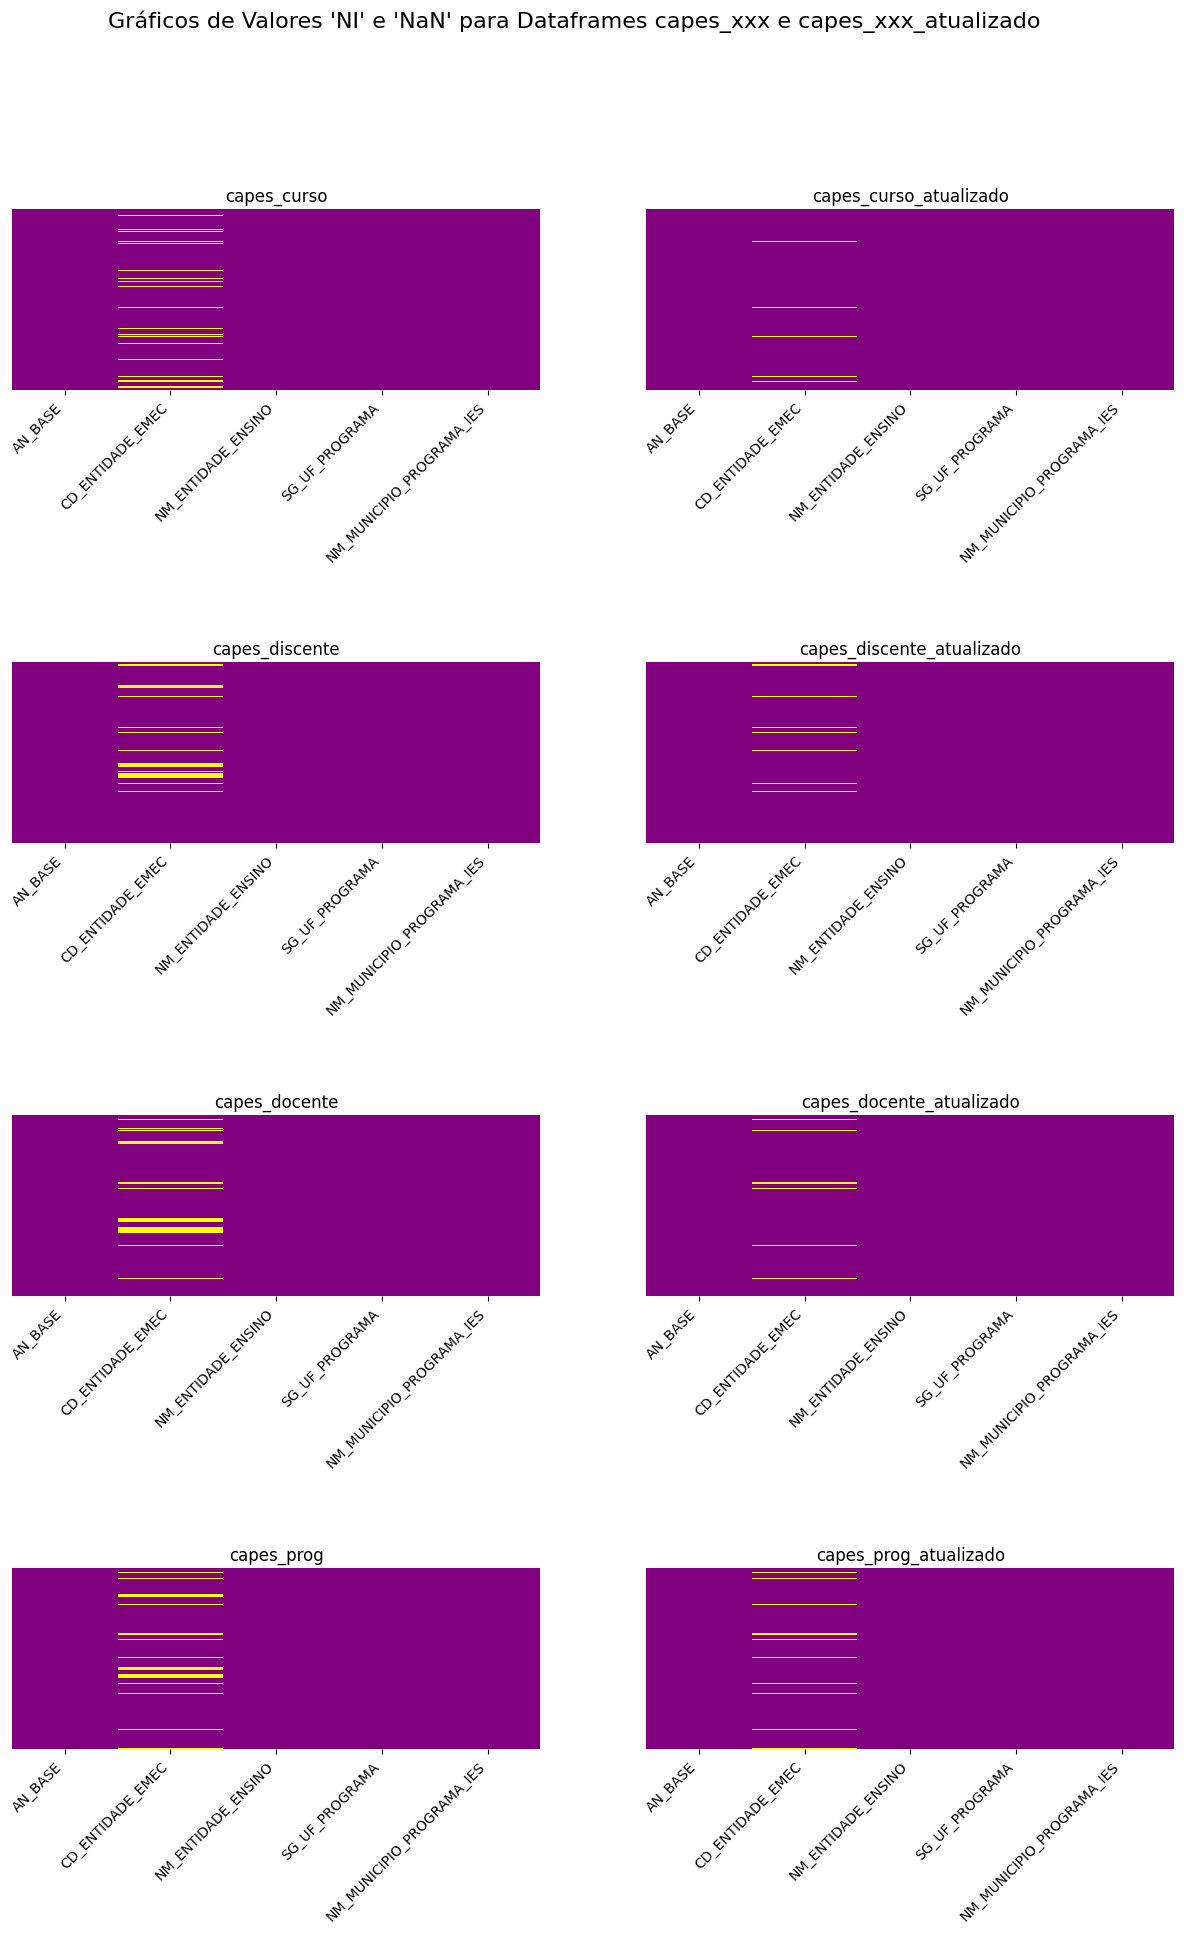

In [ ]:
# Colunas de interesse
columns_of_interest = ['AN_BASE', 'CD_ENTIDADE_EMEC', 'NM_ENTIDADE_ENSINO', 'SG_UF_PROGRAMA', 'NM_MUNICIPIO_PROGRAMA_IES']

# Lista de dataframes que atendem aos critérios
dataframes_capes_atualizado = [(df_nome, df) for df_nome, df in globals().items() if df_nome.startswith("capes_") and df_nome.endswith("_atualizado") and isinstance(df, pd.DataFrame)]

# Criar subplots para os gráficos
num_plots = len(dataframes_capes_atualizado)
fig, axs = plt.subplots(num_plots, 2, figsize=(15, 5 * num_plots))
fig.suptitle("Gráficos de Valores 'NI' e 'NaN' para Dataframes capes_xxx e capes_xxx_atualizado", fontsize=16)
fig.subplots_adjust(hspace=1.5)  # Ajuste também o espaço vertical

for i, (df_nome_atualizado, df_atualizado) in enumerate(dataframes_capes_atualizado):
    df_nome = df_nome_atualizado.replace("_atualizado", "")
    df = globals()[df_nome]

    row = i
    col = 0
    ax = axs[row, col]

    # Crie um DataFrame booleano indicando a presença de 'NI' ou 'NaN'
    mask = (df[columns_of_interest] == 'NI') | df[columns_of_interest].isna()

    # Crie um mapa de cores personalizado para representar 'NI' e 'NaN' em amarelo
    cmap = sns.color_palette(['purple', 'yellow'])  # Roxo para outros valores, amarelo para 'NI' e 'NaN'

    sns.heatmap(mask,
                yticklabels=False,
                cbar=False,
                cmap=cmap,
                ax=ax)

    ax.set_title(df_nome)

    # Definir os rótulos dos eixos x com rotação de 45 graus
    ax.set_xticklabels(columns_of_interest, rotation=45, ha="right")

    col = 1
    ax = axs[row, col]

    # Crie um DataFrame booleano indicando a presença de 'NI' ou 'NaN' no DataFrame atualizado
    mask_atualizado = (df_atualizado[columns_of_interest] == 'NI') | df_atualizado[columns_of_interest].isna()

    sns.heatmap(mask_atualizado,
                yticklabels=False,
                cbar=False,
                cmap=cmap,
                ax=ax)

    ax.set_title(df_nome_atualizado)

    # Definir os rótulos dos eixos x com rotação de 45 graus
    ax.set_xticklabels(columns_of_interest, rotation=45, ha="right")

# Salvar o gráfico no diretório de trabalho atual
plt.savefig('graficos_NI_e_NaN.png')

plt.show()

### Total de NIs após atualização

In [ ]:
# @title
# Definição de parâmetros de cor
GREEN_COLOR = '\033[92m'
END_COLOR = '\033[0m'

# Função para contar valores "NI" na coluna CD_ENTIDADE_EMEC
def contar_ni(df):
    return (df['CD_ENTIDADE_EMEC'] == 'NI').sum()

# Criar uma cópia do dicionário global
global_dict_copy = globals().copy()

# Variáveis para contagem total
total_ni_original = 0
total_ni_atualizado = 0
total_ni_corrigido = 0

# Iterar pela cópia dos dataframes cujo nome termina com "_atualizado"
for df_nome, df in global_dict_copy.items():
    if df_nome.startswith("capes_") and df_nome.endswith("_atualizado") and isinstance(df, pd.DataFrame):
        original_df_nome = df_nome.replace("_atualizado", "")

        if original_df_nome in global_dict_copy:
            original_df = global_dict_copy[original_df_nome]

            if isinstance(original_df, pd.DataFrame) and original_df_nome != df_nome:
                ni_count_original = contar_ni(original_df)
                ni_count_atualizado = contar_ni(df)
                diff_count = ni_count_original - ni_count_atualizado

                print(f"Quantidade de valores 'NI' na coluna CD_ENTIDADE_EMEC no dataframe {GREEN_COLOR}{original_df_nome}{END_COLOR}: {ni_count_original}")
                print(f"Quantidade de valores 'NI' na coluna CD_ENTIDADE_EMEC no dataframe {GREEN_COLOR}{df_nome}{END_COLOR}: {ni_count_atualizado}")
                print(f"Quantidade de valores 'NI' corrigidos: {GREEN_COLOR}{diff_count}{END_COLOR}")

                # Calcular a porcentagem de valores 'NI' corrigidos para este dataframe
                if ni_count_original > 0:
                    porcentagem_ni_corrigidos = (diff_count / ni_count_original) * 100
                else:
                    porcentagem_ni_corrigidos = 0

                print(f"Porcentagem de valores 'NI' corrigidos: {GREEN_COLOR}{porcentagem_ni_corrigidos:.2f}%{END_COLOR}\n")

                # Atualizar contagem total
                total_ni_original += ni_count_original
                total_ni_atualizado += ni_count_atualizado
                total_ni_corrigido += diff_count
        else:
            print(f"Dataframe {GREEN_COLOR}{original_df_nome}{END_COLOR} não encontrado para comparativo com {GREEN_COLOR}{df_nome}{END_COLOR}.\n")

# Calcular a porcentagem de valores 'NI' corrigidos para todos os dataframes
if total_ni_original > 0:
    porcentagem_ni_corrigidos_total = (total_ni_corrigido / total_ni_original) * 100
else:
    porcentagem_ni_corrigidos_total = 0

print(f"Porcentagem de valores 'NI' corrigidos em relação ao total de todos os dataframes: {GREEN_COLOR}{porcentagem_ni_corrigidos_total:.2f}%{END_COLOR}")


Quantidade de valores 'NI' na coluna CD_ENTIDADE_EMEC no dataframe capes_curso: 777
Quantidade de valores 'NI' na coluna CD_ENTIDADE_EMEC no dataframe capes_curso_atualizado: 262
Quantidade de valores 'NI' corrigidos: 515
Porcentagem de valores 'NI' corrigidos: 66.28%

Quantidade de valores 'NI' na coluna CD_ENTIDADE_EMEC no dataframe capes_discente: 0
Quantidade de valores 'NI' na coluna CD_ENTIDADE_EMEC no dataframe capes_discente_atualizado: 0
Quantidade de valores 'NI' corrigidos: 0
Porcentagem de valores 'NI' corrigidos: 0.00%

Quantidade de valores 'NI' na coluna CD_ENTIDADE_EMEC no dataframe capes_docente: 12713
Quantidade de valores 'NI' na coluna CD_ENTIDADE_EMEC no dataframe capes_docente_atualizado: 4800
Quantidade de valores 'NI' corrigidos: 7913
Porcentagem de valores 'NI' corrigidos: 62.24%

Quantidade de valores 'NI' na coluna CD_ENTIDADE_EMEC no dataframe capes_prog: 491
Quantidade de valores 'NI' na coluna CD_ENTIDADE_EMEC no dataframe capes_prog_atualizado: 182
Quanti

### Visualização de NIs após atualização

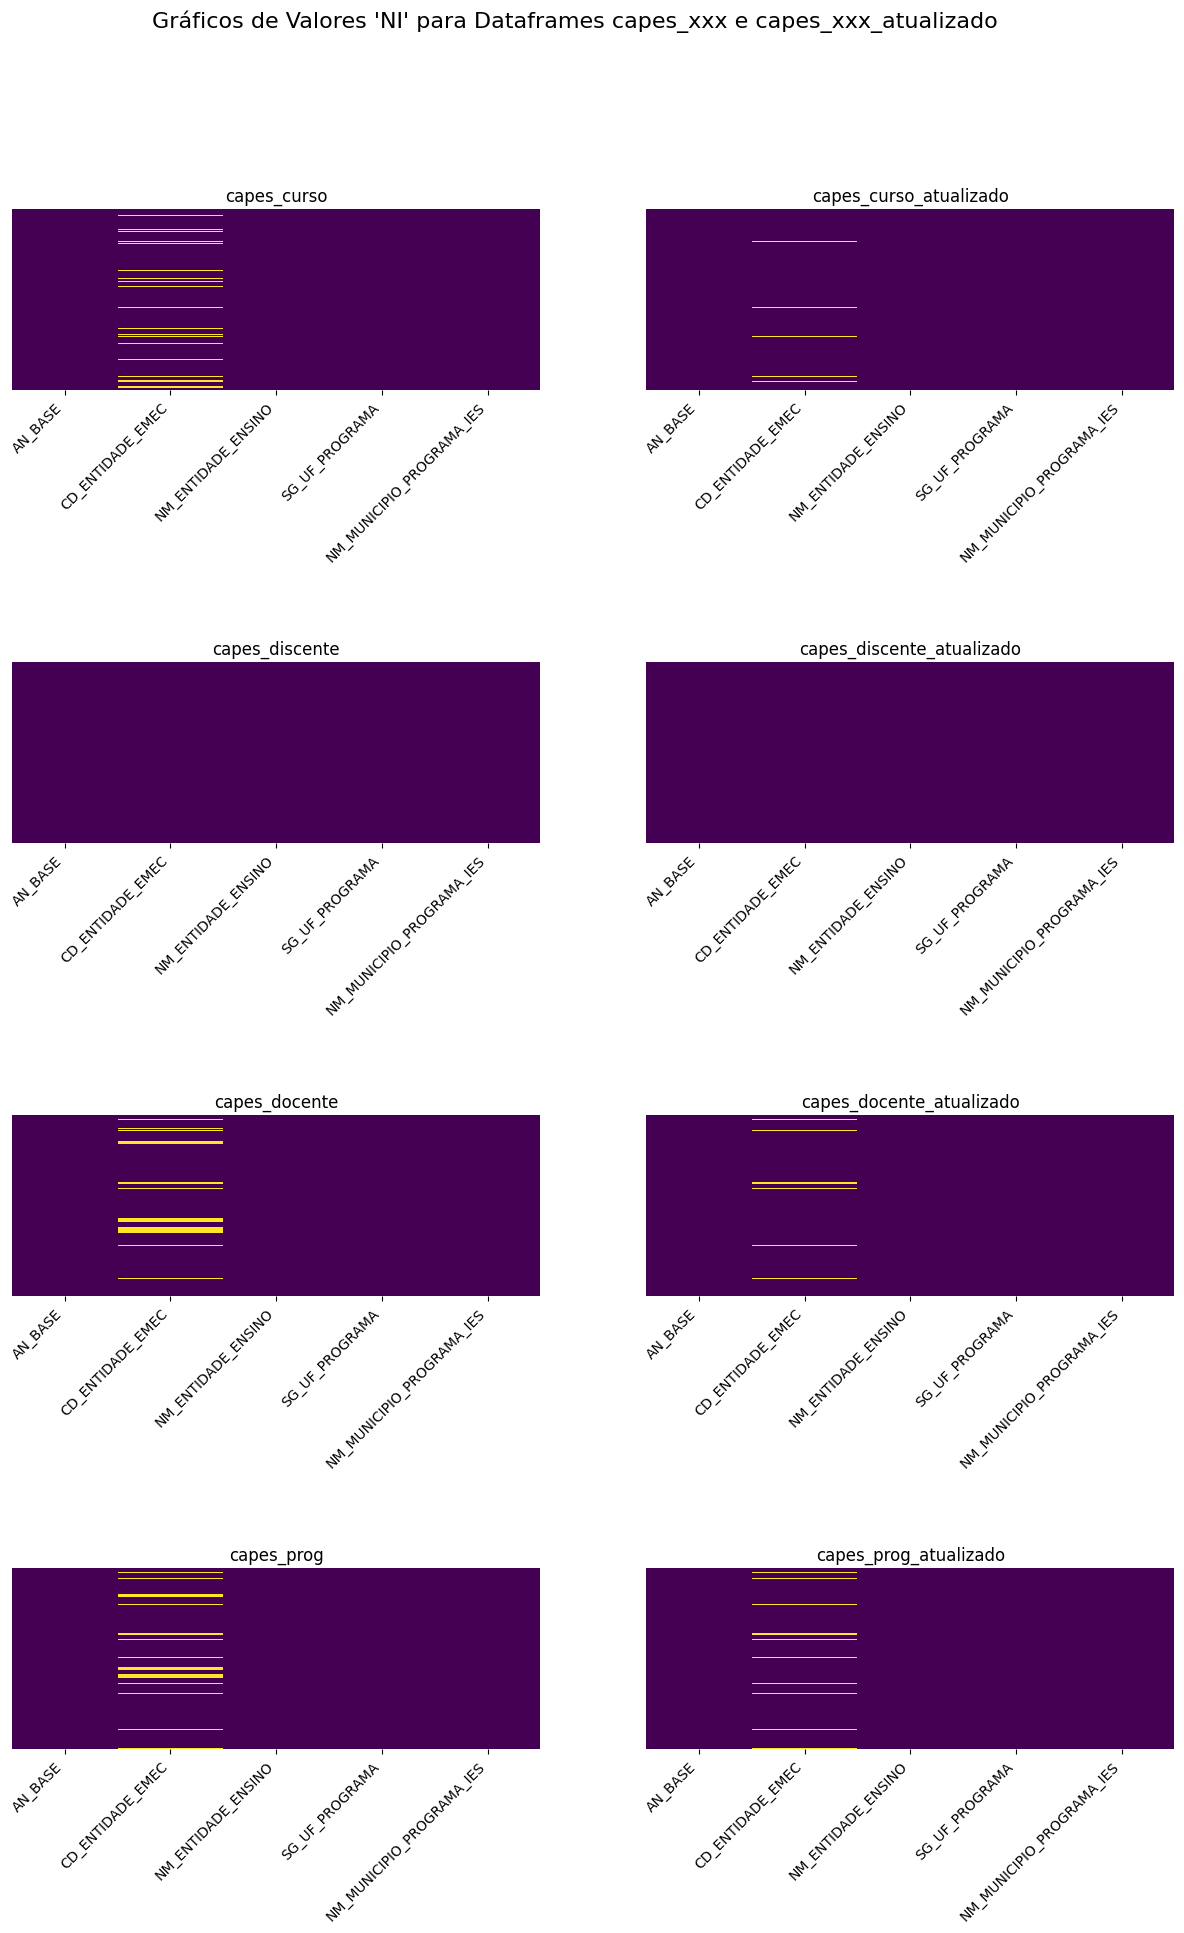

In [ ]:
# Colunas de interesse
columns_of_interest = ['AN_BASE', 'CD_ENTIDADE_EMEC', 'NM_ENTIDADE_ENSINO', 'SG_UF_PROGRAMA', 'NM_MUNICIPIO_PROGRAMA_IES']

# Lista de dataframes que atendem aos critérios
dataframes_capes_atualizado = [(df_nome, df) for df_nome, df in globals().items() if df_nome.startswith("capes_") and df_nome.endswith("_atualizado") and isinstance(df, pd.DataFrame)]

# Criar subplots para os gráficos
num_plots = len(dataframes_capes_atualizado)
fig, axs = plt.subplots(num_plots, 2, figsize=(15, 5 * num_plots))
fig.suptitle("Gráficos de Valores 'NI' para Dataframes capes_xxx e capes_xxx_atualizado", fontsize=16)
fig.subplots_adjust(hspace=1.5)  # Ajuste também o espaço vertical

for i, (df_nome_atualizado, df_atualizado) in enumerate(dataframes_capes_atualizado):
    df_nome = df_nome_atualizado.replace("_atualizado", "")
    df = globals()[df_nome]

    row = i
    col = 0
    ax = axs[row, col]

    sns.heatmap(df[columns_of_interest] == 'NI',
                yticklabels=False,
                cbar=False,
                cmap='viridis',
                ax=ax)

    ax.set_title(df_nome)

    # Definir os rótulos dos eixos x com rotação de 45 graus
    ax.set_xticklabels(columns_of_interest, rotation=45, ha="right")

    col = 1
    ax = axs[row, col]

    sns.heatmap(df_atualizado[columns_of_interest] == 'NI',
                yticklabels=False,
                cbar=False,
                cmap='viridis',
                ax=ax)

    ax.set_title(df_nome_atualizado)

    # Definir os rótulos dos eixos x com rotação de 45 graus
    ax.set_xticklabels(columns_of_interest, rotation=45, ha="right")

plt.show()

### Total de NaNs após atualização

In [ ]:
# @title
# Definição de parâmetros de cor
GREEN_COLOR = '\033[92m'
END_COLOR = '\033[0m'

# Função para contar valores NaN na coluna CD_ENTIDADE_EMEC
def contar_nans(df):
    return df['CD_ENTIDADE_EMEC'].isna().sum()

# Criar uma cópia do dicionário global
global_dict_copy = globals().copy()

# Variáveis para contagem total
total_nans_original = 0
total_nans_atualizado = 0
total_nans_corrigido = 0

# Iterar pela cópia dos dataframes cujo nome termina com "_atualizado"
for df_nome, df in global_dict_copy.items():
    if df_nome.startswith("capes_") and df_nome.endswith("_atualizado") and isinstance(df, pd.DataFrame):
        original_df_nome = df_nome.replace("_atualizado", "")

        if original_df_nome in global_dict_copy:
            original_df = global_dict_copy[original_df_nome]

            if isinstance(original_df, pd.DataFrame) and original_df_nome != df_nome:
                nans_count_original = contar_nans(original_df)
                nans_count_atualizado = contar_nans(df)
                diff_count = nans_count_original - nans_count_atualizado

                print(f"Quantidade de valores 'NaNs' na coluna CD_ENTIDADE_EMEC no dataframe {GREEN_COLOR}{original_df_nome}{END_COLOR}: {nans_count_original}")
                print(f"Quantidade de valores 'NaNs' na coluna CD_ENTIDADE_EMEC no dataframe {GREEN_COLOR}{df_nome}{END_COLOR}: {nans_count_atualizado}")
                print(f"Quantidade de valores 'NaNs' corrigidos: {GREEN_COLOR}{diff_count}{END_COLOR}")

                # Calcular a porcentagem de valores 'NaNs' corrigidos para este dataframe
                if nans_count_original > 0:
                    porcentagem_nans_corrigidos = (diff_count / nans_count_original) * 100
                else:
                    porcentagem_nans_corrigidos = 0

                print(f"Porcentagem de valores 'NaNs' corrigidos: {GREEN_COLOR}{porcentagem_nans_corrigidos:.2f}%{END_COLOR}\n")

                # Atualizar contagem total
                total_nans_original += nans_count_original
                total_nans_atualizado += nans_count_atualizado
                total_nans_corrigido += diff_count
        else:
            print(f"Dataframe {GREEN_COLOR}{original_df_nome}{END_COLOR} não encontrado para comparativo com {GREEN_COLOR}{df_nome}{END_COLOR}.\n")

# Calcular a porcentagem de valores 'NaNs' corrigidos para todos os dataframes
if total_nans_original > 0:
    porcentagem_nans_corrigidos_total = (total_nans_corrigido / total_nans_original) * 100
else:
    porcentagem_nans_corrigidos_total = 0

print(f"Porcentagem de valores 'NaNs' corrigidos em relação ao total de todos os dataframes: {GREEN_COLOR}{porcentagem_nans_corrigidos_total:.2f}%{END_COLOR}")

Quantidade de valores 'NaNs' na coluna CD_ENTIDADE_EMEC no dataframe capes_curso: 0
Quantidade de valores 'NaNs' na coluna CD_ENTIDADE_EMEC no dataframe capes_curso_atualizado: 0
Quantidade de valores 'NaNs' corrigidos: 0
Porcentagem de valores 'NaNs' corrigidos: 0.00%

Quantidade de valores 'NaNs' na coluna CD_ENTIDADE_EMEC no dataframe capes_discente: 45790
Quantidade de valores 'NaNs' na coluna CD_ENTIDADE_EMEC no dataframe capes_discente_atualizado: 15402
Quantidade de valores 'NaNs' corrigidos: 30388
Porcentagem de valores 'NaNs' corrigidos: 66.36%

Quantidade de valores 'NaNs' na coluna CD_ENTIDADE_EMEC no dataframe capes_docente: 411
Quantidade de valores 'NaNs' na coluna CD_ENTIDADE_EMEC no dataframe capes_docente_atualizado: 171
Quantidade de valores 'NaNs' corrigidos: 240
Porcentagem de valores 'NaNs' corrigidos: 58.39%

Quantidade de valores 'NaNs' na coluna CD_ENTIDADE_EMEC no dataframe capes_prog: 0
Quantidade de valores 'NaNs' na coluna CD_ENTIDADE_EMEC no dataframe capes

### Visualização de NaNs após atualização

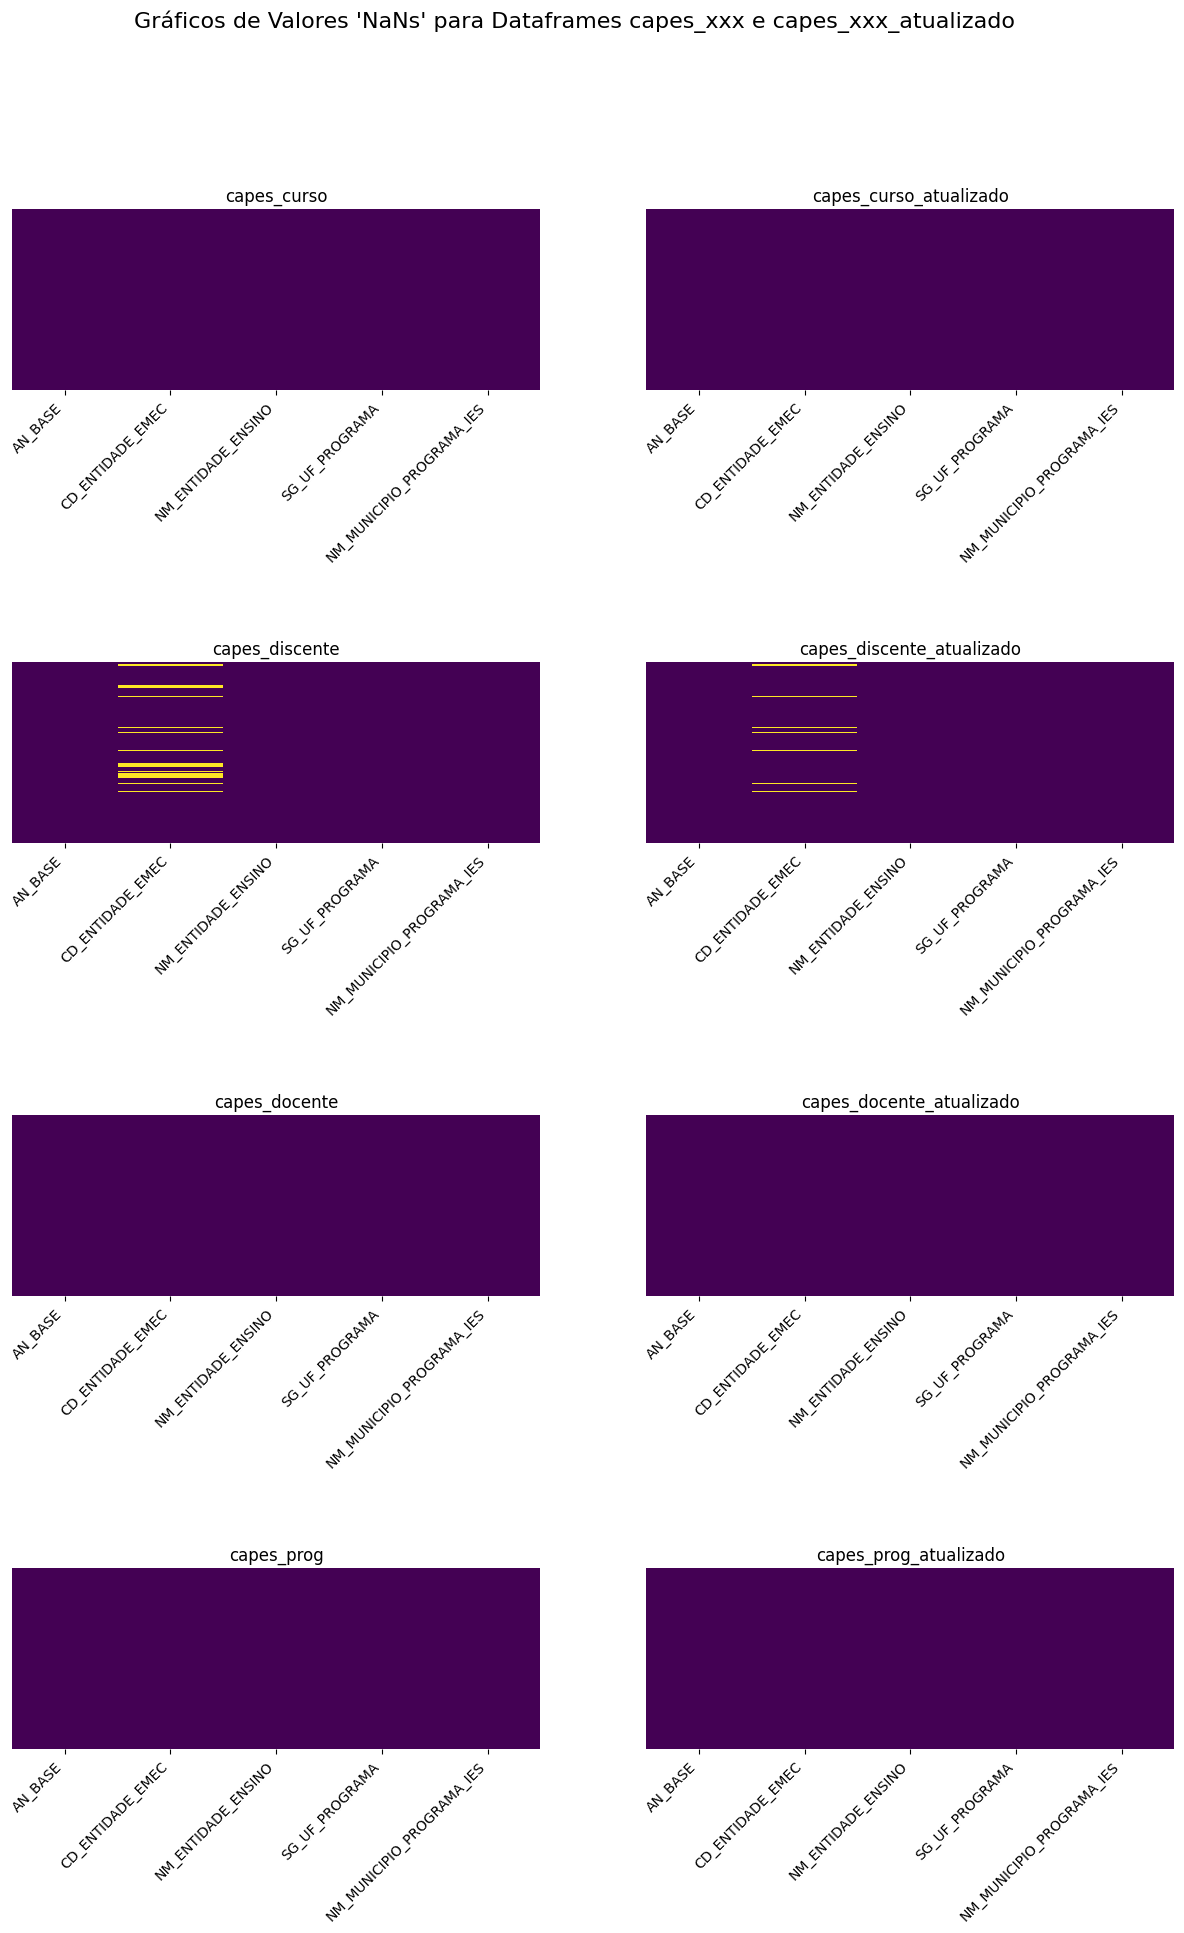

In [ ]:
# Colunas de interesse
columns_of_interest = ['AN_BASE', 'CD_ENTIDADE_EMEC', 'NM_ENTIDADE_ENSINO', 'SG_UF_PROGRAMA', 'NM_MUNICIPIO_PROGRAMA_IES']

# Lista de dataframes que atendem aos critérios
dataframes_capes_atualizado = [(df_nome, df) for df_nome, df in globals().items() if df_nome.startswith("capes_") and df_nome.endswith("_atualizado") and isinstance(df, pd.DataFrame)]

# Criar subplots para os gráficos
num_plots = len(dataframes_capes_atualizado)
fig, axs = plt.subplots(num_plots, 2, figsize=(15, 5 * num_plots))
fig.suptitle("Gráficos de Valores 'NaNs' para Dataframes capes_xxx e capes_xxx_atualizado", fontsize=16)
fig.subplots_adjust(hspace=1.5)  # Ajuste também o espaço vertical

for i, (df_nome_atualizado, df_atualizado) in enumerate(dataframes_capes_atualizado):
    df_nome = df_nome_atualizado.replace("_atualizado", "")
    df = globals()[df_nome]

    row = i
    col = 0
    ax = axs[row, col]

    # Converter o dataframe para um array NumPy
    df_values = df[columns_of_interest].values

    sns.heatmap(pd.DataFrame(df_values).isna(),
                yticklabels=False,
                cbar=False,
                cmap='viridis',
                ax=ax)

    ax.set_title(df_nome)

    # Definir os rótulos dos eixos x e y
    ax.set_xticklabels(columns_of_interest, rotation=45, ha="right")
    ax.set_yticklabels([])

    col = 1
    ax = axs[row, col]

    # Converter o dataframe atualizado para um array NumPy
    df_atualizado_values = df_atualizado[columns_of_interest].values

    sns.heatmap(pd.DataFrame(df_atualizado_values).isnull(),
                yticklabels=False,
                cbar=False,
                cmap='viridis',
                ax=ax)

    ax.set_title(df_nome_atualizado)

    # Definir os rótulos dos eixos x e y
    ax.set_xticklabels(columns_of_interest, rotation=45, ha="right")
    ax.set_yticklabels([])

plt.show()

Obs.: É possível que os valores 'NaN' não sejam exibidos no gráfico de calor se eles não estiverem aglomerados em uma área significativa do dataframe. Portanto, se os valores 'NaN' estiverem espalhados por todo o dataframe ou não estiverem concentrados em uma área específica, eles podem não ser visíveis no gráfico de calor.

# CES

## Inserção das colunas NO_IES e SG_IES no df cadastro_cursos

### Colunas em comum dos dfs cadastro_xxx

In [ ]:
# # Definição de parâmetros de cor
# GREEN_COLOR = '\033[92m'
# END_COLOR = '\033[0m'

# # Listar todos os dataframes globais
# dataframes_globais = [df for df_name, df in globals().items() if isinstance(df, pd.DataFrame)]

# # Filtrar dataframes com nomes que começam com "cadastro_" e não terminam com "_atualizado"
# dataframes_cadastro = [(df_name, df) for df_name, df in globals().items() if df_name.startswith("cadastro_") and not df_name.endswith("_atualizado")]

# # Verificar as colunas em comum entre os dataframes
# if dataframes_cadastro:
#     colunas_em_comum = set(dataframes_cadastro[0][1].columns)

#     for df_name, df in dataframes_cadastro[1:]:
#         colunas_em_comum.intersection_update(df.columns)

#     if colunas_em_comum:
#         print(f"{GREEN_COLOR}Colunas em comum nos dfs cadastro_xxx:{END_COLOR}\n")
#         for coluna in colunas_em_comum:
#             print(coluna)
#     else:
#         print("Não há colunas em comum nos dataframes.")
# else:
#     print("Nenhum dataframe com nome começando com 'cadastro_' e não terminando com '_atualizado' encontrado.")

### Cruzamento de dados

In [ ]:
# # Criar uma cópia do cadastro_cursos
# cadastro_cursos_atualizado = cadastro_cursos.copy()

# # Crie um mapeamento com base nas colunas em comum
# mapeamento = cadastro_ies.set_index(['NU_ANO_CENSO', 'TP_CATEGORIA_ADMINISTRATIVA', 'TP_ORGANIZACAO_ACADEMICA', 'CO_IES'])[['NO_IES', 'SG_IES']]

# # Use o método map para adicionar as colunas ao cadastro_cursos_atualizado com base nas colunas em comum
# cadastro_cursos_atualizado['NO_IES'] = cadastro_cursos.set_index(['NU_ANO_CENSO', 'TP_CATEGORIA_ADMINISTRATIVA', 'TP_ORGANIZACAO_ACADEMICA', 'CO_IES']).index.map(mapeamento['NO_IES'])
# cadastro_cursos_atualizado['SG_IES'] = cadastro_cursos.set_index(['NU_ANO_CENSO', 'TP_CATEGORIA_ADMINISTRATIVA', 'TP_ORGANIZACAO_ACADEMICA', 'CO_IES']).index.map(mapeamento['SG_IES'])

In [ ]:
# cadastro_cursos_atualizado[['NU_ANO_CENSO',
#                             'NO_IES',
#                             'SG_IES',
#                             'CO_IES',
#                             'SG_UF',
#                             'NO_MUNICIPIO',
#                             'TP_CATEGORIA_ADMINISTRATIVA',
#                             'TP_ORGANIZACAO_ACADEMICA']].head()

# Pós-tratamento de dados

## Unificar o CD_ENTIDADE_EMEC da UNESP

In [ ]:
# Dicionário para armazenar os DataFrames que serão atualizados
dataframes_para_atualizar = {}

# Lista dos nomes dos dataframes que começam com "capes_" e terminam com "_atualizado"
dataframe_names = [df_nome for df_nome in globals() if df_nome.startswith("capes_") and df_nome.endswith("_atualizado") and isinstance(globals()[df_nome], pd.DataFrame)]

# Valor a ser substituído
valor_substituir = '691248'
novo_valor = '56'

# Itere pelos nomes dos dataframes
for df_nome in dataframe_names:
    df = globals()[df_nome]

    # Verifique se a coluna 'CD_ENTIDADE_EMEC' existe no DataFrame
    if 'CD_ENTIDADE_EMEC' in df.columns:
        # Converta os valores da coluna 'CD_ENTIDADE_EMEC' para strings e, em seguida, substitua o valor '691248' por '56'
        df['CD_ENTIDADE_EMEC'] = df['CD_ENTIDADE_EMEC'].astype(str).str.replace(valor_substituir, novo_valor)

        # Adicione o DataFrame à lista de DataFrames para atualizar
        dataframes_para_atualizar[df_nome] = df

# Exiba o nome dos DataFrames atualizados
for df_nome, df_atualizado in dataframes_para_atualizar.items():
    print(f"DataFrame \033[34m{df_nome}\033[0m corrigido com sucesso!")

DataFrame capes_curso_atualizado corrigido com sucesso!
DataFrame capes_discente_atualizado corrigido com sucesso!
DataFrame capes_docente_atualizado corrigido com sucesso!
DataFrame capes_prog_atualizado corrigido com sucesso!


## Inserção da coluna SG_IES do df ces_ies nos dfs capes_xxx_atualizado

Cruzamento de dados: colunas capes_xxx_atualizado['NM_ENTIDADE_ENSINO'] versus ces_ies['NO_IES'].

In [ ]:
# Extrair os valores únicos das colunas 'NM_ENTIDADE_ENSINO' do dataframe atual
valores_unicos_atual = df['NM_ENTIDADE_ENSINO'].unique()

# Criar um dicionário de mapeamento entre 'NM_ENTIDADE_ENSINO' e 'NO_IES'
mapeamento = {}
for valor_atual in valores_unicos_atual:
    filtro = globals()['cadastro_ies']['NO_IES'].str.contains(valor_atual, case=False, na=False)
    valores_cadastro = globals()['cadastro_ies'][filtro]['SG_IES'].unique()
    if len(valores_cadastro) == 1:
        mapeamento[valor_atual] = valores_cadastro[0]

# Collect the dataframes that meet the criteria in a list
dataframes_to_modify = []

# Iterate through the global variables to find dataframes
for df_nome, df in globals().items():
    if df_nome.startswith("capes_") and df_nome.endswith("_atualizado") and isinstance(df, pd.DataFrame):
        dataframes_to_modify.append((df_nome, df))

# Iterate over the collected dataframes
for df_nome, df in dataframes_to_modify:
    # Extrair o nome base do dataframe
    base_df_nome = df_nome.replace("_atualizado", "")

    # Verificar se o dataframe 'base_df_nome' existe
    if base_df_nome in globals() and isinstance(globals()[base_df_nome], pd.DataFrame):
        # Mapear 'NM_ENTIDADE_ENSINO' para 'SG_IES' usando o dicionário de mapeamento
        df['SG_IES'] = df['NM_ENTIDADE_ENSINO'].map(mapeamento)
    else:
        print(f"Dataframe {base_df_nome} não encontrado.")


## Inserção individualizada de siglas ausentes

Após o cruzamento de dados.

In [ ]:
# Autentificação de usuário Google

# Tabela do Google Planilhas
from google.colab import auth
import gspread
from google.auth import default

auth.authenticate_user()

creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
# Indicando a tabela do Google Sheets
worksheet = gc.open('siglas_iess').sheet1

# Obtendo todos os valores das linhas
rows = worksheet.get_all_values()

# Convertendo para o formato de dataframe
dic_siglas = pd.DataFrame(rows[1:], columns=rows[0])

In [ ]:
# dic_siglas.head()

In [ ]:
# Inicialize o dicionário ies_siglas
ies_siglas = {}

# Função para converter um valor 'chave:valor' em um dicionário e adicioná-lo ao ies_siglas
def converter_para_dicionario(valor):
    chave, valor = valor.split(':')
    ies_siglas[chave.strip()] = valor.strip()

# Aplicar a função a cada valor da coluna 'iess_sem_sigla'
dic_siglas['iess_sem_sigla'].apply(converter_para_dicionario)

# Imprimir chaves e valores juntos em linhas separadas
for chave, valor in ies_siglas.items():
    print(f'{chave}: {valor}')

INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DE ALAGOAS: IFAL
UNIVERSIDADE ESTADUAL PAULISTA JÚLIO DE MESQUITA FILHO: UNESP
INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DE SÃO PAULO: IFSP
UNIVERSIDADE FEDERAL DO NORTE DO TOCANTINS: UFNT
UNIVERSIDADE FEDERAL DO DELTA DO PARNAÍBA: UFDPar
INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DE BRASÍLIA: IFB
INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DO CEARÁ: IFCE
INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DA PARAÍBA: IFPB
UNIVERSIDADE DO ESTADO DO AMAPÁ: UEAP
INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DE MATO GROSSO DO SUL: IFMS
INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DE MATO GROSSO: IFMT
UNIVERSIDADE FEDERAL DE MATO GROSSO: UFMT
INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DE SANTA CATARINA: IFSC
INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DE RONDÔNIA: IFRO
INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA FARROUPILHA: IFFAR
INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TEC

In [ ]:
# Calcula o número de IESs no dicionário
numero_ies = len(ies_siglas)

# Exibe o resultado
print("Número de IESs:", numero_ies)

Número de IESs: 291


In [ ]:
# Itere pelos dataframes que atendem aos critérios
for df_nome, df in globals().items():
    if df_nome.startswith("capes_") and df_nome.endswith("_atualizado") and isinstance(df, pd.DataFrame):
        # Verifique se as colunas necessárias existem no DataFrame
        if 'NM_ENTIDADE_ENSINO' in df.columns and 'SG_IES' in df.columns:
            # Atualize a coluna 'SG_IES' com base no dicionário ies_siglas
            df['SG_IES'] = df['NM_ENTIDADE_ENSINO'].map(ies_siglas)

## Identificação de IESs sem sigla - Global

In [ ]:
# Crie um conjunto vazio para armazenar as IESs sem sigla
ies_sem_sigla = set()

# Itere pelos dataframes que atendem aos critérios
for df_nome, df in globals().items():
    if df_nome.startswith("capes_") and df_nome.endswith("_atualizado") and isinstance(df, pd.DataFrame):
        if 'NM_ENTIDADE_ENSINO' in df.columns and 'SG_IES' in df.columns:
            # Encontre as IESs que não possuem sigla neste DataFrame
            ies_sem_sigla.update(set(df['NM_ENTIDADE_ENSINO'][df['SG_IES'].isnull()]))

# Exiba apenas o nome à esquerda de cada IES sem sigla
for ies in ies_sem_sigla:
    print(ies.split(':')[0])  # Isso divide o nome usando ':' como separador e pega apenas a parte à esquerda

FUNDAÇÃO CESGRANRIO
CENTRO UNIVERSITÁRIO INTERNACIONAL
SOCIEDADE BRASILEIRA DE FÍSICA
CENTRO UNIVERSITÁRIO ESTADUAL DA ZONA OESTE
FACULDADE FIPECAFI
CENTRO UNIVERSITÁRIO INTA
CENTRO UNIVERSITÁRIO 7 DE SETEMBRO
CENTRO UNIVERSITÁRIO DE BAURU
INSTITUTO DE TECNOLOGIA E EDUCAÇÃO GALILEO DA AMAZÔNIA
SECRETARIA DO MEIO AMBIENTE E INFRAESTRUTURA
SOCIEDADE BRASILEIRA DE FISIOLOGIA
CENTRO UNIVERSITÁRIO SÃO CAMILO
INSPER INSTITUTO DE ENSINO E PESQUISA
FUCAPE PESQUISA E ENSINO S/A
CENTRO DE PESQUISA EM SAÚDE ANIMAL
CENTRO BRASILEIRO DE PESQUISAS FÍSICAS
FACULDADE DINÂMICA DO VALE DO PIRANGA
CENTRO UNIVERSITÁRIO AUGUSTO MOTTA
HOSPITAL NOSSA SENHORA CONCEIÇÃO
FACULDADE DE DIREITO DE VITÓRIA
ESCOLA DE ECONOMIA DE SÃO PAULO
FACULDADE CERS
CENTRO UNIVERSITÁRIO SATC
INSTITUTO DE BOTÂNICA
ASSOCIAÇÃO BRASILEIRA DE SAÚDE COLETIVA
ESCOLA DE DIREITO DE SÃO PAULO
FACULDADE ISRAELITA DE CIÊNCIAS DA SAÚDE ALBERT EINSTEIN
FACULDADE UNIDA DE VITÓRIA
UNIVERSITÀ DEGLI STUDI DI PERUGIA
ESCOLA SUPERIOR DOM HELDER CÂM

In [ ]:
len(ies_sem_sigla)

156

## Identificação de IESs públicas sem sigla

In [ ]:
# Lista de prefixos permitidos
prefixos_permitidos = (
    'UNIVERSIDADE',
    'UNIVERSIDADE FEDERAL',
    'INSTITUTO FEDERAL',
    'UNIVERSIDADE ESTADUAL',
    'CENTRO FEDERAL',
    'UNIVERSIDADE ESTADUAL',
    'UNIVERSIDADE DO ESTADO',
    'INSTITUTO NACIONAL',
    'INSTITUTO DE PESQUISAS'
)

# Crie uma lista para armazenar as IESs sem sigla
ies_publicas_sem_sigla = []

# Itere pelos dataframes que atendem aos critérios
for df_nome, df in globals().items():
    if df_nome.startswith("capes_") and df_nome.endswith("_atualizado") and isinstance(df, pd.DataFrame):
        # Verifique se a coluna 'SG_IES' existe no dataframe e se há valores NaN
        if 'SG_IES' in df.columns and df['SG_IES'].isna().any():
            # Extraia as IESs que não possuem sigla e atendem aos critérios de prefixo
            ies_publicas_sem_sigla.extend(df[(df['SG_IES'].isna()) & (df['NM_ENTIDADE_ENSINO'].str.startswith(prefixos_permitidos))]['NM_ENTIDADE_ENSINO'].unique())

# Remova valores duplicados da lista de IESs sem sigla
ies_publicas_sem_sigla = list(set(ies_publicas_sem_sigla))

# Exiba apenas o nome à esquerda de cada IES sem sigla
for ies in ies_publicas_sem_sigla:
    print(ies.split(':')[0])  # Isso divide o nome usando ':' como separador e pega apenas a parte à esquerda

In [ ]:
# Número de IESs públicas sem sigla após a atualização
len(ies_publicas_sem_sigla)

0

In [ ]:
# Percentual de IESs públicas sem sigla após a atualização
print(round(len(ies_publicas_sem_sigla)*100/len(ies_sem_sigla), 2), '%')

0.0 %


## Identificação de IESs cujo CD_ENTIDADE_EMEC é NI ou NaN

Após o cruzamento de dados.

In [ ]:
# Conjunto para armazenar os nomes únicos das IESs
nomes_ies_unicos = set()

# Função para identificar "NI" ou NaN na coluna CD_ENTIDADE_EMEC e adicionar os nomes únicos ao conjunto
def identificar_ni_ou_nan(df):
    nomes = df[(df['CD_ENTIDADE_EMEC'] == 'NI') | df['CD_ENTIDADE_EMEC'].isna()]['NM_ENTIDADE_ENSINO'].unique()
    for nome in nomes:
        nomes_ies_unicos.add(nome)

# Lista para armazenar os nomes dos DataFrames que atendem aos critérios
dataframes_selecionados = []

# Iterar pelos DataFrames e selecionar os que atendem aos critérios
for df_nome, df in globals().items():
    if df_nome.startswith("capes_") and df_nome.endswith("_atualizado") and isinstance(df, pd.DataFrame):
        dataframes_selecionados.append(df)

# Iterar pelos DataFrames selecionados, identificar "NI" ou NaN e adicionar nomes únicos ao conjunto
for df in dataframes_selecionados:
    identificar_ni_ou_nan(df)

# Exibir os nomes únicos empilhados
nomes_empilhados = '\n'.join(nomes_ies_unicos)
# print(nomes_empilhados)

In [ ]:
# Número de IESs cujo CD_ENTIDADE_EMEC é NI ou NaN
len(nomes_empilhados)

3509

## IESs públicas sem CD_ENTIDADE_EMEC definido

In [ ]:
# Lista para armazenar as IESs que atendem às condições
ies_atendem_condicoes = []

# Itera por todas as variáveis globais
for var_nome, var_valor in list(globals().items()):
    # Verifica se a variável é um DataFrame que atende aos critérios
    if isinstance(var_valor, pd.DataFrame) and var_nome.startswith("capes_") and var_nome.endswith("_atualizado"):
        df_copia = var_valor.copy()

        # Aplica as condições de filtragem ao DataFrame
        df_filtrado = df_copia[
            ((df_copia['CD_ENTIDADE_EMEC'] == "NI") | df_copia['CD_ENTIDADE_EMEC'].isna()) &
            (df_copia['NM_ENTIDADE_ENSINO'].str.startswith('UNIVERSIDADE FEDERAL') |
             df_copia['NM_ENTIDADE_ENSINO'].str.startswith('INSTITUTO FEDERAL') |
             df_copia['NM_ENTIDADE_ENSINO'].str.startswith('CENTRO FEDERAL'))
        ]

        # Verifica se há dados no DataFrame após a filtragem
        if not df_filtrado.empty:
            # Obtém a coluna 'NM_ENTIDADE_ENSINO' que contém o nome da IES
            ies = df_filtrado[['NM_ENTIDADE_ENSINO', 'CD_ENTIDADE_EMEC']].drop_duplicates()

            # Adiciona as IESs ao DataFrame
            ies_atendem_condicoes.append(ies)

# Concatena todos os DataFrames de IESs em um único DataFrame
resultado_final = pd.concat(ies_atendem_condicoes)

# Remove as linhas duplicadas (manterá apenas valores únicos)
resultado_final = resultado_final.drop_duplicates()

# Exibe os valores únicos no DataFrame final
print(resultado_final.to_string(index=False))

                        NM_ENTIDADE_ENSINO CD_ENTIDADE_EMEC
UNIVERSIDADE FEDERAL DO NORTE DO TOCANTINS               NI


In [ ]:
# @title
print("Número de Institutos Federais, Universidades Federais e Centros Federais sem código e-MEC:\n", resultado_final.shape[0])

Número de Institutos Federais, Universidades Federais e Centros Federais sem código e-MEC:
 1


## Inserção individualizada de códigos EMEC de IESs públicas

Pesquisa na plataforma web do EMEC.

In [ ]:
# Iterar pelos DataFrames globais
for df_nome, df in globals().items():
    # Verificar se o nome do DataFrame começa com "capes_" e termina com "_atualizado" e se é um DataFrame
    if df_nome.startswith("capes_") and df_nome.endswith("_atualizado") and isinstance(df, pd.DataFrame):
        # Substituir 'CD_ENTIDADE_EMEC' quando 'NM_ENTIDADE_ENSINO' for igual a 'UNIVERSIDADE FEDERAL DO NORTE DO TOCANTINS'
        df.loc[df['NM_ENTIDADE_ENSINO'] == 'UNIVERSIDADE FEDERAL DO NORTE DO TOCANTINS', 'CD_ENTIDADE_EMEC'] = '3849'

## Substituir todos os NIs remanescentes por NaNs nos dfs capes_xxx_atualizado
Após o cruzamento de dados.

In [ ]:
# Função para substituir "NI" por NaN na coluna CD_ENTIDADE_EMEC de um DataFrame
def substituir_ni_por_nan(df):
    df['CD_ENTIDADE_EMEC'] = df['CD_ENTIDADE_EMEC'].replace('NI', np.nan)
    return df

# Lista para armazenar os DataFrames que atendem aos critérios
dataframes_selecionados = []

# Iterar pelos DataFrames e selecionar os que atendem aos critérios
for df_nome, df in globals().items():
    if df_nome.startswith("capes_") and df_nome.endswith("_atualizado") and isinstance(df, pd.DataFrame):
        dataframes_selecionados.append(df)

# Iterar pelos DataFrames selecionados e aplicar a substituição de "NI" por NaN
for df in dataframes_selecionados:
    df = substituir_ni_por_nan(df)

# CES

## Inserção individualizada de siglas ausentes

In [ ]:
# # Verifique se as colunas necessárias existem no DataFrame cadastro_cursos_atualizado
# if 'NM_ENTIDADE_ENSINO' in cadastro_cursos_atualizado.columns and 'SG_IES' in cadastro_cursos_atualizado.columns:
#     # Use apply para atualizar a coluna 'SG_IES' com base no dicionário ies_siglas
#     cadastro_cursos_atualizado['SG_IES'] = cadastro_cursos_atualizado.apply(lambda row: ies_siglas.get(row['NM_ENTIDADE_ENSINO'], row['SG_IES']), axis=1)

## Correção dos valores NaNs nas colunas SG_UF e NO_MUNICIPIO

### IESs Global

In [ ]:
# colunas_interesse = ['NU_ANO_CENSO',
#                     'NO_IES',
#                     'SG_IES',
#                     'CO_IES',
#                     'SG_UF',
#                     'NO_MUNICIPIO',
#                     'TP_CATEGORIA_ADMINISTRATIVA',
#                     'TP_ORGANIZACAO_ACADEMICA']

# # Filtrar o DataFrame com base em SG_UF e NO_MUNICIPIO sendo NaN
# filtro_nan = cadastro_cursos_atualizado[cadastro_cursos_atualizado[['SG_UF', 'NO_MUNICIPIO']].isna().any(axis=1)][colunas_interesse]

# # Obter os valores únicos nas colunas selecionadas
# valores_unicos = filtro_nan.drop_duplicates()

# # Use o método to_string() para exibir os valores únicos no DataFrame
# print(valores_unicos.to_string(index=False))

In [ ]:
# valores_unicos.shape[0]

### IESs Públicas

In [ ]:
# # Lista de prefixos permitidos
# prefixos_permitidos = (
#     'UNIVERSIDADE',
#     'UNIVERSIDADE FEDERAL',
#     'INSTITUTO FEDERAL',
#     'UNIVERSIDADE ESTADUAL',
#     'CENTRO FEDERAL',
#     'UNIVERSIDADE ESTADUAL',
#     'UNIVERSIDADE DO ESTADO',
#     'INSTITUTO NACIONAL',
#     'INSTITUTO DE PESQUISAS'
# )

# # Colunas de interesse
# colunas_interesse = ['NU_ANO_CENSO',
#                     'NO_IES',
#                     'SG_IES',
#                     'CO_IES',
#                     'SG_UF',
#                     'NO_MUNICIPIO',
#                     'TP_CATEGORIA_ADMINISTRATIVA',
#                     'TP_ORGANIZACAO_ACADEMICA']

# # Verifique se as colunas necessárias existem no DataFrame cadastro_cursos_atualizado
# if all(col in cadastro_cursos_atualizado.columns for col in colunas_interesse):
#     # Verifique se a coluna 'NO_IES' começa com um dos prefixos permitidos
#     filtro_prefixos = cadastro_cursos_atualizado['NO_IES'].str.upper().str.startswith(prefixos_permitidos)

#     # Filtrar o DataFrame com base em SG_UF e NO_MUNICIPIO sendo NaN e prefixos permitidos
#     filtro_nan = cadastro_cursos_atualizado[cadastro_cursos_atualizado[['SG_UF', 'NO_MUNICIPIO']].isna().any(axis=1) & filtro_prefixos]

#     # Obter os valores únicos nas colunas selecionadas
#     valores_unicos = filtro_nan.drop_duplicates(subset=colunas_interesse)

#     # Selecionar apenas as colunas de interesse
#     valores_unicos = valores_unicos[colunas_interesse]

#     # Use o método to_string() para exibir os valores únicos no DataFrame
#     print(valores_unicos.to_string(index=False))
# else:
#     print("As colunas necessárias não estão presentes no DataFrame.")

# Conferência dos resultados

## CES

In [ ]:
# Filtrar o subdataframe
filtro = cadastro_ies['NO_IES'] == 'UNIVERSIDADE ESTADUAL PAULISTA JÚLIO DE MESQUITA FILHO'
subdataframe = cadastro_ies.loc[filtro, ['NU_ANO_CENSO', 'CO_IES', 'NO_IES', 'SG_IES','SG_UF_IES', 'NO_MUNICIPIO_IES']]

subdataframe.head()

,NU_ANO_CENSO,CO_IES,NO_IES,SG_IES,SG_UF_IES,NO_MUNICIPIO_IES
39,2021,56,UNIVERSIDADE ESTADUAL PAULISTA JÚLIO DE MESQUI...,UNESP,SP,São Paulo


In [ ]:
# Filtrar o subdataframe
filtro = cadastro_cursos['CO_IES'] == 591 # UNIFESP
subdataframe = cadastro_cursos.loc[filtro, ['NU_ANO_CENSO', 'CO_IES', 'SG_UF', 'NO_MUNICIPIO']]

subdataframe.head(20)

,NU_ANO_CENSO,CO_IES,SG_UF,NO_MUNICIPIO
226,2021,591,NaN,NaN
275931,2021,591,SP,Diadema
275932,2021,591,SP,Diadema
275933,2021,591,SP,Diadema
275934,2021,591,SP,Diadema
275935,2021,591,SP,Diadema
275936,2021,591,SP,Diadema
275937,2021,591,SP,Diadema
281267,2021,591,SP,Guarulhos
281268,2021,591,SP,Guarulhos


In [ ]:
# Filtrar o subdataframe
filtro = cadastro_ies['NO_IES'].str.lower() == 'universidade federal de rondônia'
subdataframe = cadastro_ies.loc[filtro, ['NO_IES', 'NU_ANO_CENSO', 'CO_IES', 'NO_IES', 'SG_UF_IES', 'NO_MUNICIPIO_IES']]

subdataframe.head()

,NO_IES,NU_ANO_CENSO,CO_IES,NO_IES,SG_UF_IES,NO_MUNICIPIO_IES
342,UNIVERSIDADE FEDERAL DE RONDÔNIA,2021,699,UNIVERSIDADE FEDERAL DE RONDÔNIA,RO,Porto Velho


In [ ]:
# Filtrar o subdataframe
filtro = cadastro_cursos['CO_IES'] == 661
subdataframe = cadastro_cursos.loc[filtro, ['CO_IES', 'NU_ANO_CENSO', 'SG_UF', 'NO_MUNICIPIO']]

subdataframe.head(20)

,CO_IES,NU_ANO_CENSO,SG_UF,NO_MUNICIPIO
128593,661,2021,SE,Aracaju
128594,661,2021,SE,Aracaju
128595,661,2021,SE,Aracaju
128596,661,2021,SE,Aracaju
128597,661,2021,SE,Aracaju
128598,661,2021,SE,Aracaju
128599,661,2021,SE,Aracaju
128600,661,2021,SE,Aracaju
128601,661,2021,SE,Aracaju


## CAPES

In [ ]:
# Defina a condição de filtro
filtro = capes_curso['NM_ENTIDADE_ENSINO'].str.lower() == 'universidade federal de rondônia'

# Colunas de interesse
columns_of_interest = ['AN_BASE', 'CD_ENTIDADE_EMEC', 'NM_ENTIDADE_ENSINO', 'SG_UF_PROGRAMA', 'NM_MUNICIPIO_PROGRAMA_IES']

# Crie o subdataframe
subdataframe = capes_curso.loc[filtro, columns_of_interest]

# Use o método to_string() para exibir o DataFrame inteiro
print(subdataframe.to_string())

      AN_BASE CD_ENTIDADE_EMEC                NM_ENTIDADE_ENSINO SG_UF_PROGRAMA NM_MUNICIPIO_PROGRAMA_IES
68       2021              699  UNIVERSIDADE FEDERAL DE RONDÔNIA             RO               PORTO VELHO
363      2021              699  UNIVERSIDADE FEDERAL DE RONDÔNIA             RO            ROLIM DE MOURA
700      2021              699  UNIVERSIDADE FEDERAL DE RONDÔNIA             RO               PORTO VELHO
1160     2021              699  UNIVERSIDADE FEDERAL DE RONDÔNIA             RO               PORTO VELHO
1543     2021              699  UNIVERSIDADE FEDERAL DE RONDÔNIA             RO                 JI-PARANÁ
1545     2021              699  UNIVERSIDADE FEDERAL DE RONDÔNIA             RO               PORTO VELHO
1552     2021              699  UNIVERSIDADE FEDERAL DE RONDÔNIA             RO            ROLIM DE MOURA
1720     2021              699  UNIVERSIDADE FEDERAL DE RONDÔNIA             RO               PORTO VELHO
2048     2021              699  UNIVERSIDADE F

In [ ]:
# Filtro para encontrar o termo exato
filtro = capes_docente_atualizado['NM_ENTIDADE_ENSINO'].str.strip().str.lower() == 'universidade federal do norte do tocantins'

# Colunas de interesse
columns_of_interest = ['AN_BASE', 'CD_ENTIDADE_EMEC', 'NM_ENTIDADE_ENSINO', 'SG_IES', 'SG_UF_PROGRAMA', 'NM_MUNICIPIO_PROGRAMA_IES']

# Crie o subdataframe
subdataframe = capes_docente_atualizado.loc[filtro, columns_of_interest]

# Use o método to_string() para exibir o DataFrame inteiro
print(subdataframe.to_string())

      AN_BASE CD_ENTIDADE_EMEC                          NM_ENTIDADE_ENSINO SG_IES SG_UF_PROGRAMA NM_MUNICIPIO_PROGRAMA_IES
6874     2021             3849  UNIVERSIDADE FEDERAL DO NORTE DO TOCANTINS   UFNT             TO                 ARAGUAÍNA
6875     2021             3849  UNIVERSIDADE FEDERAL DO NORTE DO TOCANTINS   UFNT             TO                 ARAGUAÍNA
6876     2021             3849  UNIVERSIDADE FEDERAL DO NORTE DO TOCANTINS   UFNT             TO                 ARAGUAÍNA
6877     2021             3849  UNIVERSIDADE FEDERAL DO NORTE DO TOCANTINS   UFNT             TO                 ARAGUAÍNA
6878     2021             3849  UNIVERSIDADE FEDERAL DO NORTE DO TOCANTINS   UFNT             TO                 ARAGUAÍNA
6879     2021             3849  UNIVERSIDADE FEDERAL DO NORTE DO TOCANTINS   UFNT             TO                 ARAGUAÍNA
6880     2021             3849  UNIVERSIDADE FEDERAL DO NORTE DO TOCANTINS   UFNT             TO                 ARAGUAÍNA
6881     2021   

In [ ]:
# Defina a condição de filtro
filtro = capes_docente_atualizado['NM_ENTIDADE_ENSINO'].str.lower() == 'universidade estadual paulista júlio de mesquita filho'

# Colunas de interesse
columns_of_interest = ['AN_BASE', 'CD_ENTIDADE_EMEC', 'NM_ENTIDADE_ENSINO', 'SG_IES', 'SG_UF_PROGRAMA', 'NM_MUNICIPIO_PROGRAMA_IES']

# Crie o subdataframe
subdataframe = capes_docente_atualizado.loc[filtro, columns_of_interest]

# Use o método to_string() para exibir o DataFrame inteiro
print(subdataframe.to_string())

       AN_BASE CD_ENTIDADE_EMEC                                      NM_ENTIDADE_ENSINO SG_IES SG_UF_PROGRAMA NM_MUNICIPIO_PROGRAMA_IES
68172     2021               56  UNIVERSIDADE ESTADUAL PAULISTA JÚLIO DE MESQUITA FILHO  UNESP             SP                 SÃO PAULO
68173     2021               56  UNIVERSIDADE ESTADUAL PAULISTA JÚLIO DE MESQUITA FILHO  UNESP             SP                 SÃO PAULO
68174     2021               56  UNIVERSIDADE ESTADUAL PAULISTA JÚLIO DE MESQUITA FILHO  UNESP             SP                 SÃO PAULO
68175     2021               56  UNIVERSIDADE ESTADUAL PAULISTA JÚLIO DE MESQUITA FILHO  UNESP             SP                 SÃO PAULO
68176     2021               56  UNIVERSIDADE ESTADUAL PAULISTA JÚLIO DE MESQUITA FILHO  UNESP             SP                 SÃO PAULO
68177     2021               56  UNIVERSIDADE ESTADUAL PAULISTA JÚLIO DE MESQUITA FILHO  UNESP             SP                 SÃO PAULO
68178     2021               56  UNIVERSIDADE ES

In [ ]:
# Defina a condição de filtro
filtro = capes_discente_atualizado['NM_ENTIDADE_ENSINO'].str.lower() == 'universidade estadual de mato grosso do sul "dourados"'

# Colunas de interesse
columns_of_interest = ['AN_BASE', 'CD_ENTIDADE_EMEC', 'NM_ENTIDADE_ENSINO', 'SG_IES', 'SG_UF_PROGRAMA', 'NM_MUNICIPIO_PROGRAMA_IES']

# Crie o subdataframe
subdataframe = capes_discente_atualizado.loc[filtro, columns_of_interest]

subdataframe.head(50)

,AN_BASE,CD_ENTIDADE_EMEC,NM_ENTIDADE_ENSINO,SG_IES,SG_UF_PROGRAMA,NM_MUNICIPIO_PROGRAMA_IES


In [ ]:
# Defina a condição de filtro
filtro = capes_docente_atualizado['NM_ENTIDADE_ENSINO'].str.lower() == 'universidade federal de são paulo'

# Colunas de interesse
columns_of_interest = ['AN_BASE', 'CD_ENTIDADE_EMEC', 'NM_ENTIDADE_ENSINO', 'SG_IES', 'SG_UF_PROGRAMA', 'NM_MUNICIPIO_PROGRAMA_IES']

# Crie o subdataframe
subdataframe = capes_docente_atualizado.loc[filtro, columns_of_interest]

subdataframe.head()

,AN_BASE,CD_ENTIDADE_EMEC,NM_ENTIDADE_ENSINO,SG_IES,SG_UF_PROGRAMA,NM_MUNICIPIO_PROGRAMA_IES
72399,2021,591,UNIVERSIDADE FEDERAL DE SÃO PAULO,UNIFESP,SP,SÃO PAULO
72400,2021,591,UNIVERSIDADE FEDERAL DE SÃO PAULO,UNIFESP,SP,SÃO PAULO
72401,2021,591,UNIVERSIDADE FEDERAL DE SÃO PAULO,UNIFESP,SP,SÃO JOSÉ DOS CAMPOS
72402,2021,591,UNIVERSIDADE FEDERAL DE SÃO PAULO,UNIFESP,SP,SÃO PAULO
72403,2021,591,UNIVERSIDADE FEDERAL DE SÃO PAULO,UNIFESP,SP,SÃO PAULO


In [ ]:
subdataframe.shape[0]

1674

In [ ]:
# Defina a condição de filtro
filtro = capes_prog_atualizado['NM_ENTIDADE_ENSINO'].str.lower() == 'universidade federal do abc'

# Colunas de interesse
columns_of_interest = ['AN_BASE', 'CD_ENTIDADE_EMEC', 'NM_ENTIDADE_ENSINO', 'SG_IES', 'SG_UF_PROGRAMA', 'NM_MUNICIPIO_PROGRAMA_IES']

# Crie o subdataframe
subdataframe = capes_prog_atualizado.loc[filtro, columns_of_interest]

subdataframe.head()

,AN_BASE,CD_ENTIDADE_EMEC,NM_ENTIDADE_ENSINO,SG_IES,SG_UF_PROGRAMA,NM_MUNICIPIO_PROGRAMA_IES
3210,2021,4925,UNIVERSIDADE FEDERAL DO ABC,UFABC,SP,SÃO BERNARDO DO CAMPO
3211,2021,4925,UNIVERSIDADE FEDERAL DO ABC,UFABC,SP,SANTO ANDRÉ
3212,2021,4925,UNIVERSIDADE FEDERAL DO ABC,UFABC,SP,SANTO ANDRÉ
3213,2021,4925,UNIVERSIDADE FEDERAL DO ABC,UFABC,SP,SANTO ANDRÉ
3214,2021,4925,UNIVERSIDADE FEDERAL DO ABC,UFABC,SP,SANTO ANDRÉ


In [ ]:
subdataframe.shape[0]

26

In [ ]:
# Filtrar as linhas onde CD_ENTIDADE_EMEC é NaN
subdataframe = capes_curso_atualizado[capes_curso_atualizado['CD_ENTIDADE_EMEC'].isna()][['CD_ENTIDADE_EMEC', 'NM_ENTIDADE_ENSINO',  'SG_IES', 'SG_UF_PROGRAMA']]

subdataframe.head(10)

,CD_ENTIDADE_EMEC,NM_ENTIDADE_ENSINO,SG_IES,SG_UF_PROGRAMA
34,NaN,ASSOCIAÇÃO PARADIGMA CENTRO DE CIÊNCIAS E TECN...,NaN,SP
36,NaN,INSTITUTO DE PESQUISAS ENERGÉTICAS E NUCLEARES,IPEN,SP
41,NaN,UNIVERSIDADE DA FORÇA AÉREA,UNIFA,RJ
76,NaN,INSTITUTO NACIONAL DE PESQUISAS DA AMAZÔNIA,INPA,AM
84,NaN,CENTRO DE ESTUDOS E SISTEMAS AVANÇADOS DO RECIFE,NaN,PE
114,NaN,INSTITUTO NACIONAL DE PESQUISAS DA AMAZÔNIA,INPA,AM
125,NaN,HOSPITAL A.C.CAMARGO,NaN,SP
169,NaN,CENTRO DE DESENVOLVIMENTO DA TECNOLOGIA NUCLEAR,CDTN,MG
230,NaN,FUCAPE PESQUISA E ENSINO S/A,NaN,MA
277,NaN,MUSEU DE ASTRONOMIA E CIÊNCIAS AFINS,NaN,RJ


In [ ]:
subdataframe.shape[0]

257

In [ ]:
# Filtrar as linhas onde CD_ENTIDADE_EMEC é igual a "NI"
subdataframe = capes_docente_atualizado[capes_docente['CD_ENTIDADE_EMEC'].isna()][['CD_ENTIDADE_EMEC', 'NM_ENTIDADE_ENSINO',  'SG_IES', 'SG_UF_PROGRAMA']]

subdataframe.head(10)

,CD_ENTIDADE_EMEC,NM_ENTIDADE_ENSINO,SG_IES,SG_UF_PROGRAMA
745,nan,CENTRO DE PESQUISA AGROFLORESTAL DE RONDÔNIA,NaN,RO
746,nan,CENTRO DE PESQUISA AGROFLORESTAL DE RONDÔNIA,NaN,RO
747,nan,CENTRO DE PESQUISA AGROFLORESTAL DE RONDÔNIA,NaN,RO
748,nan,CENTRO DE PESQUISA AGROFLORESTAL DE RONDÔNIA,NaN,RO
749,nan,CENTRO DE PESQUISA AGROFLORESTAL DE RONDÔNIA,NaN,RO
2299,nan,EMPRESA BRASILEIRA DE PESQUISA AGROPECUÁRIA,EMBRAPA,AC
2300,nan,EMPRESA BRASILEIRA DE PESQUISA AGROPECUÁRIA,EMBRAPA,AC
2780,nan,FUNDAÇÃO DE DERMATOLOGIA TROPICAL E VENEREOLOG...,NaN,AM
2781,nan,FUNDAÇÃO DE DERMATOLOGIA TROPICAL E VENEREOLOG...,NaN,AM
2782,nan,FUNDAÇÃO DE DERMATOLOGIA TROPICAL E VENEREOLOG...,NaN,AM


In [ ]:
subdataframe.shape[0]

411

In [ ]:
# Filtrar as linhas onde CD_ENTIDADE_EMEC é igual a "NI"
subdataframe = capes_discente_atualizado[capes_discente['CD_ENTIDADE_EMEC'].isna()][['CD_ENTIDADE_EMEC', 'NM_ENTIDADE_ENSINO', 'SG_IES', 'SG_UF_PROGRAMA']]

subdataframe.head(10)

,CD_ENTIDADE_EMEC,NM_ENTIDADE_ENSINO,SG_IES,SG_UF_PROGRAMA
2150,nan,CENTRO DE PESQUISA AGROFLORESTAL DE RONDÔNIA,NaN,RO
2151,nan,CENTRO DE PESQUISA AGROFLORESTAL DE RONDÔNIA,NaN,RO
2152,nan,CENTRO DE PESQUISA AGROFLORESTAL DE RONDÔNIA,NaN,RO
2153,nan,CENTRO DE PESQUISA AGROFLORESTAL DE RONDÔNIA,NaN,RO
2154,nan,CENTRO DE PESQUISA AGROFLORESTAL DE RONDÔNIA,NaN,RO
2155,nan,FUNDAÇÃO OSWALDO CRUZ,FIOCRUZ,RO
2156,nan,FUNDAÇÃO OSWALDO CRUZ,FIOCRUZ,RO
2157,nan,FUNDAÇÃO OSWALDO CRUZ,FIOCRUZ,RO
5217,nan,INSTITUTO NACIONAL DE PESQUISAS DA AMAZÔNIA,INPA,AM
5218,nan,INSTITUTO NACIONAL DE PESQUISAS DA AMAZÔNIA,INPA,AM


In [ ]:
# Filtrar as linhas onde CD_ENTIDADE_EMEC é igual a "NI" ou é NaN
filtered_subdataframe = capes_curso_atualizado[
    (capes_curso_atualizado['CD_ENTIDADE_EMEC'].isin(["NI", np.nan]))
][['CD_ENTIDADE_EMEC', 'NM_ENTIDADE_ENSINO', 'SG_IES', 'SG_UF_PROGRAMA']]

filtered_subdataframe.head(20)

,CD_ENTIDADE_EMEC,NM_ENTIDADE_ENSINO,SG_IES,SG_UF_PROGRAMA
34,NaN,ASSOCIAÇÃO PARADIGMA CENTRO DE CIÊNCIAS E TECN...,NaN,SP
36,NaN,INSTITUTO DE PESQUISAS ENERGÉTICAS E NUCLEARES,IPEN,SP
41,NaN,UNIVERSIDADE DA FORÇA AÉREA,UNIFA,RJ
76,NaN,INSTITUTO NACIONAL DE PESQUISAS DA AMAZÔNIA,INPA,AM
84,NaN,CENTRO DE ESTUDOS E SISTEMAS AVANÇADOS DO RECIFE,NaN,PE
114,NaN,INSTITUTO NACIONAL DE PESQUISAS DA AMAZÔNIA,INPA,AM
125,NaN,HOSPITAL A.C.CAMARGO,NaN,SP
169,NaN,CENTRO DE DESENVOLVIMENTO DA TECNOLOGIA NUCLEAR,CDTN,MG
230,NaN,FUCAPE PESQUISA E ENSINO S/A,NaN,MA
277,NaN,MUSEU DE ASTRONOMIA E CIÊNCIAS AFINS,NaN,RJ


In [ ]:
# @title
print("Número total de NIs e NaNs após cruzamento no BD capes_prog_atualizado: \n",filtered_subdataframe.shape[0])

Número total de NIs e NaNs após cruzamento no BD capes_prog_atualizado: 
 257


In [ ]:
# Filtrar as linhas onde NM_ENTIDADE_ENSINO é igual a ...
subdataframe = df_modelo[df_modelo['NM_ENTIDADE_ENSINO'] == "UNIVERSIDADE FEDERAL DO NORTE DO TOCANTINS"][['CD_ENTIDADE_EMEC', 'NM_ENTIDADE_ENSINO', 'SG_UF_PROGRAMA']]

subdataframe.head(10)

,CD_ENTIDADE_EMEC,NM_ENTIDADE_ENSINO,SG_UF_PROGRAMA


# Renomeio de colunas dos BDs capes_xxx_atualizado

In [ ]:
# Dicionário de nomes de colunas para renomear
nomes_cols = {
    'NM_ENTIDADE_ENSINO': 'NO_IES',
    'SG_UF_PROGRAMA': 'SG_UF_IES'
}

# Lista para armazenar os DataFrames selecionados
dataframes_selecionados = []

# Iterar pelos DataFrames no seu ambiente
for df_nome, df in globals().items():
    if df_nome.startswith("capes_") and df_nome.endswith("_atualizado") and isinstance(df, pd.DataFrame):
        dataframes_selecionados.append((df_nome, df))

# Crie uma cópia das chaves do dicionário de nomes de colunas
chaves_nomes_cols = list(nomes_cols.keys())

# Renomear as colunas nos DataFrames selecionados
for df_nome, df in dataframes_selecionados:
    for coluna_antiga in chaves_nomes_cols:
        novo_nome = nomes_cols[coluna_antiga]
        if coluna_antiga in df.columns:
            df.rename(columns={coluna_antiga: novo_nome}, inplace=True)

# Download dos BDs atualizados

## CAPES

In [ ]:
# Lista de DataFrames que atendem aos critérios
dataframes_selecionados = []

# Iterar pelos DataFrames no seu ambiente
for df_nome, df in globals().items():
    if df_nome.startswith("capes_") and df_nome.endswith("_atualizado") and isinstance(df, pd.DataFrame):
        dataframes_selecionados.append((df_nome, df))

# Certifique-se de que o diretório 'capes' existe
if not os.path.exists(capes):
    os.makedirs(capes)

# Iterar pelos DataFrames selecionados e salvar em CSV UTF-8 (sobrescrevendo arquivos existentes)
for nome, df in dataframes_selecionados:
    nome_arquivo = os.path.join(capes, f"{nome}.csv")
    df.to_csv(nome_arquivo, index=False, sep=';', encoding='utf-8', mode='w')

print("Download dos DataFrames concluído.")

Download dos DataFrames concluído.


## CES

In [ ]:
# # Diretório de destino
# diretorio_destino = ces

# # Nome do arquivo (mesmo nome do DataFrame)
# nome_arquivo = "cadastro_cursos_atualizado.csv"

# # Caminho completo do arquivo de destino
# caminho_destino = os.path.join(diretorio_destino, nome_arquivo)

# # Salvar o DataFrame como um arquivo CSV com codificação utf-8, substituindo o arquivo existente
# cadastro_cursos_atualizado.to_csv(caminho_destino, sep=';', encoding='utf-8', index=False, mode='w')

# # Obter o nome do arquivo (sem o caminho)
# nome_arquivo_sem_caminho = os.path.basename(caminho_destino)

# print(f"O DataFrame 'cadastro_cursos_atualizado' foi salvo e o arquivo existente '{nome_arquivo_sem_caminho}' foi substituído.")